In [ ]:
# evaluating whether GPT can capture many more dependencies in one layer, ie creating
# a much larger delay embedding (as would be necessary due to noise)
# my hypothesis is they can't do this, because attention is sparse.
# adding more heads could allow for it, so we'll investigate that too

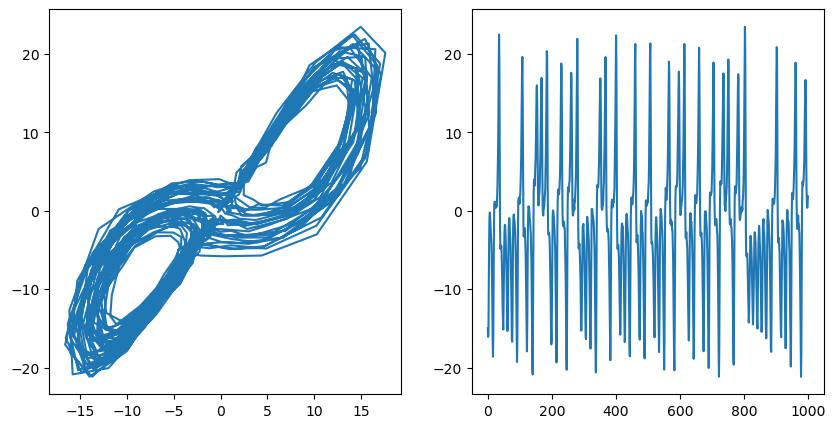

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import embed_signal_torch
import torch

%load_ext autoreload
%autoreload 2
from dysts.flows import Lorenz
from utils import train, make_dataset

## Load and simulate an attractor
model = Lorenz()
model.dt = 0.05
sol = model.make_trajectory(1000, resample=False, noise=0.0)

sol += np.random.normal(0, 0.3, sol.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(sol[:, 0], sol[:, 1])
ax[1].plot(sol[:, 1])

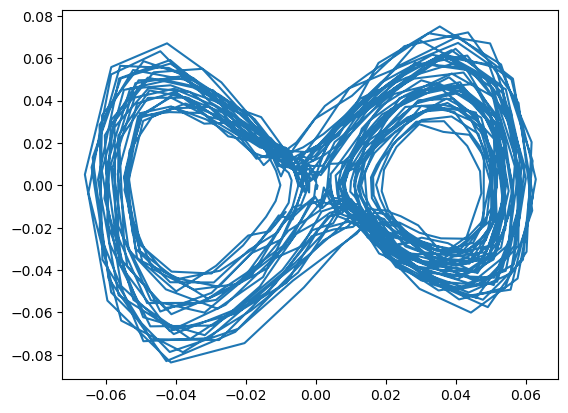

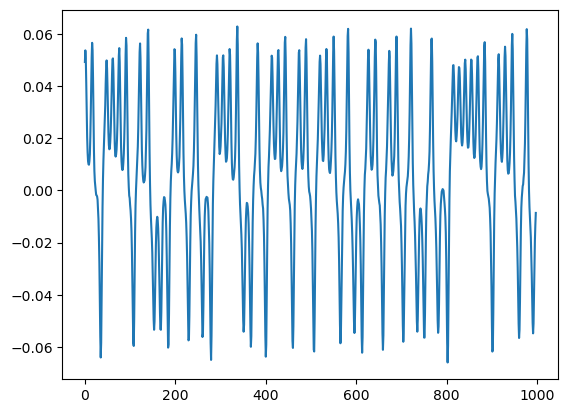

In [2]:
n_delays = 3
delay_interval = 1

H = embed_signal_torch(sol[:, 0:1], n_delays, delay_interval)

U, S, V = torch.svd(H.T)

V = V.cpu().numpy()
plt.plot(V[:, 0], V[:, 1])
plt.figure()
plt.plot(V[:1000, 0])

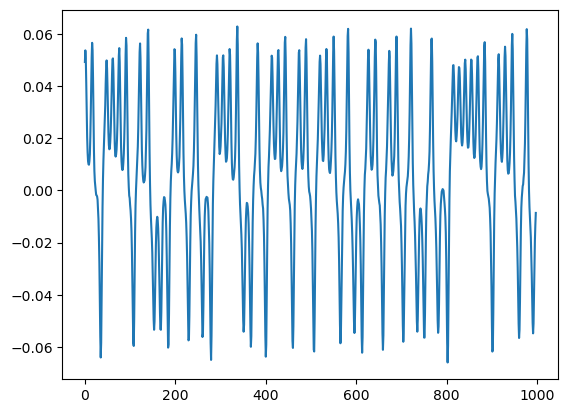

In [3]:
plt.plot(V[:, 0])

In [4]:
import sys

sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/")
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/src")
from models import GPT

(100, 300, 3) torch.Size([100, 100, 1])
(100, 300, 3) torch.Size([100, 100, 1])
(100, 300, 3)


IndexError: index 100 is out of bounds for axis 0 with size 100

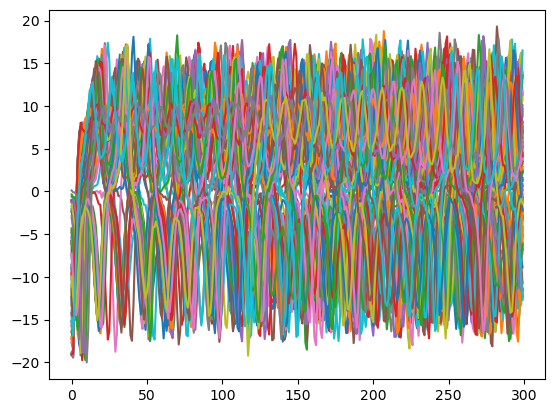

In [5]:
# let's train it
obs_noise = 0.3
batch_size = 16
length = 100
nsamples = 100
dt = 0.05
train_loader, val_loader, train_data, val_data = make_dataset(
    Lorenz, length, nsamples, obs_noise=obs_noise, batch_size=batch_size, dt=dt
)
print(train_data.shape)
plt.figure()
for i in range(0, 1000, 1):
    plt.plot(train_data[i, :1000, 0])

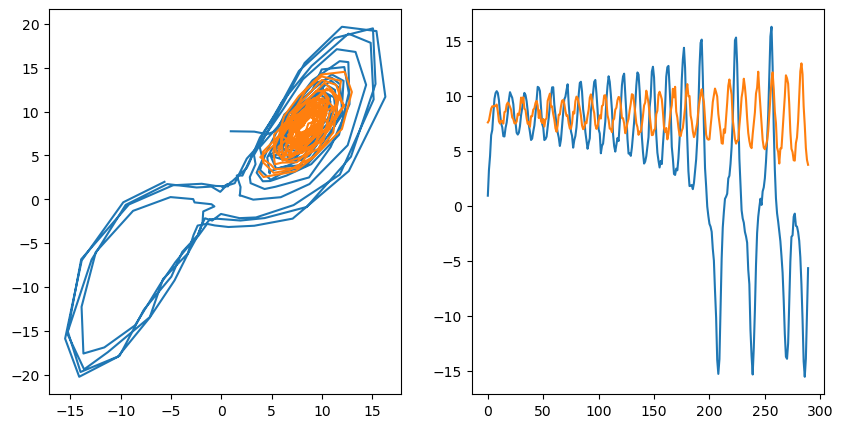

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    ax[0].plot(train_data[i, 10:, 0], train_data[i, 10:, 1])
    ax[1].plot(train_data[i, 10:, 0])

In [8]:
kwargs = dict(
    input_dim=1,
    d_model=10,
    n_head=1,
    context_length=100,
    mlp_hidden=40,
    seed=11,
    temp=None,
    use_pe=True,
)

model = GPT(**kwargs)

In [9]:
from torch.optim import AdamW
import torch.nn as nn

epochs = 1000
lr = 1e-3

model, train_loss, val_loss = train(
    model, train_loader, val_loader, epochs, lr, AdamW, nn.MSELoss(), "cuda"
)

/om2/user/ostrow/anaconda/envs/nn_delays/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 5/1000 [00:00<01:01, 16.15it/s]

Epoch 0 Training Loss: 42.97831671578543
Epoch 0 Validation Loss: 41.33099038260324
Epoch 1 Training Loss: 39.91199057442801
Epoch 1 Validation Loss: 37.96620668683733
Epoch 2 Training Loss: 36.94483402797154
Epoch 2 Validation Loss: 34.77895137241909
Epoch 3 Training Loss: 33.42685753958566
Epoch 3 Validation Loss: 31.11574227469308
Epoch 4 Training Loss: 29.615833827427455
Epoch 4 Validation Loss: 27.364762714930944
Epoch 5 Training Loss: 26.259444100516184
Epoch 5 Validation Loss: 23.588056836809432
Epoch 6 Training Loss: 22.66321781703404
Epoch 6 Validation Loss: 20.248870304652623
Epoch 7 Training Loss: 19.288302285330637
Epoch 7 Validation Loss: 16.831389699663436


  1%|▏         | 13/1000 [00:00<00:35, 28.01it/s]

Epoch 8 Training Loss: 16.932812690734863
Epoch 8 Validation Loss: 14.597382136753627
Epoch 9 Training Loss: 15.222599574497767
Epoch 9 Validation Loss: 13.922441755022321
Epoch 10 Training Loss: 14.182165145874023
Epoch 10 Validation Loss: 13.417563710893903
Epoch 11 Training Loss: 13.640848296029228
Epoch 11 Validation Loss: 12.242018972124372
Epoch 12 Training Loss: 12.81002071925572
Epoch 12 Validation Loss: 11.918136324201312
Epoch 13 Training Loss: 12.432866505214147
Epoch 13 Validation Loss: 11.303465979439872
Epoch 14 Training Loss: 11.601197106497628
Epoch 14 Validation Loss: 10.400019645690918
Epoch 15 Training Loss: 11.017041615077428
Epoch 15 Validation Loss: 9.818544796534947


  2%|▏         | 22/1000 [00:00<00:28, 34.90it/s]

Epoch 16 Training Loss: 10.164172172546387
Epoch 16 Validation Loss: 9.22227246420724
Epoch 17 Training Loss: 9.309215273175921
Epoch 17 Validation Loss: 8.678584371294294
Epoch 18 Training Loss: 8.849025181361608
Epoch 18 Validation Loss: 8.016544342041016
Epoch 19 Training Loss: 8.378892762320381
Epoch 19 Validation Loss: 7.712561130523682
Epoch 20 Training Loss: 7.967742579323905
Epoch 20 Validation Loss: 7.338359287806919
Epoch 21 Training Loss: 7.909397806440081
Epoch 21 Validation Loss: 7.385071754455566
Epoch 22 Training Loss: 7.581773281097412
Epoch 22 Validation Loss: 6.929621423993792
Epoch 23 Training Loss: 7.486799035753522
Epoch 23 Validation Loss: 6.914715085710798
Epoch 24 Training Loss: 7.431141648973737


  3%|▎         | 31/1000 [00:01<00:25, 37.46it/s]

Epoch 24 Validation Loss: 6.650704043252127
Epoch 25 Training Loss: 7.065609863826206
Epoch 25 Validation Loss: 6.823601109640939
Epoch 26 Training Loss: 7.053193160465786
Epoch 26 Validation Loss: 6.616241795676095
Epoch 27 Training Loss: 6.79413366317749
Epoch 27 Validation Loss: 6.4794407572065085
Epoch 28 Training Loss: 6.851717676435198
Epoch 28 Validation Loss: 6.51193380355835
Epoch 29 Training Loss: 6.673298495156424
Epoch 29 Validation Loss: 6.418391977037702
Epoch 30 Training Loss: 6.7184127398899625
Epoch 30 Validation Loss: 6.233257974897112
Epoch 31 Training Loss: 6.534108570643833
Epoch 31 Validation Loss: 6.2407180922372
Epoch 32 Training Loss: 6.386751651763916


  4%|▍         | 39/1000 [00:01<00:25, 38.25it/s]

Epoch 32 Validation Loss: 6.034401757376535
Epoch 33 Training Loss: 6.351148673466274
Epoch 33 Validation Loss: 6.00389153616769
Epoch 34 Training Loss: 6.196718147822788
Epoch 34 Validation Loss: 5.830878462110247
Epoch 35 Training Loss: 6.14936705998012
Epoch 35 Validation Loss: 5.725689819880894
Epoch 36 Training Loss: 6.069881234850202
Epoch 36 Validation Loss: 5.721999032156808
Epoch 37 Training Loss: 5.9709563936506
Epoch 37 Validation Loss: 5.72140223639352
Epoch 38 Training Loss: 5.794399465833392
Epoch 38 Validation Loss: 5.510157993861607
Epoch 39 Training Loss: 5.776690074375698
Epoch 39 Validation Loss: 5.490396635872977
Epoch 40 Training Loss: 5.709893090384347


  5%|▍         | 48/1000 [00:01<00:24, 38.52it/s]

Epoch 40 Validation Loss: 5.3281950269426614
Epoch 41 Training Loss: 5.593395846230643
Epoch 41 Validation Loss: 5.348640101296561
Epoch 42 Training Loss: 5.496112551007952
Epoch 42 Validation Loss: 5.197662557874407
Epoch 43 Training Loss: 5.478011540004185
Epoch 43 Validation Loss: 5.240302358354841
Epoch 44 Training Loss: 5.386683872767857
Epoch 44 Validation Loss: 5.114428588322231
Epoch 45 Training Loss: 5.225794451577323
Epoch 45 Validation Loss: 4.820426634379795
Epoch 46 Training Loss: 5.151404585157122
Epoch 46 Validation Loss: 4.969110488891602
Epoch 47 Training Loss: 5.2026375361851285
Epoch 47 Validation Loss: 4.786319732666016
Epoch 48 Training Loss: 5.136729649135044


  6%|▌         | 56/1000 [00:01<00:24, 38.06it/s]

Epoch 48 Validation Loss: 4.873210634504046
Epoch 49 Training Loss: 5.111879212515695
Epoch 49 Validation Loss: 4.794981139046805
Epoch 50 Training Loss: 4.960393837520054
Epoch 50 Validation Loss: 4.731010028294155
Epoch 51 Training Loss: 5.00661209651402
Epoch 51 Validation Loss: 4.693735803876605
Epoch 52 Training Loss: 4.853921685900007
Epoch 52 Validation Loss: 4.613784313201904
Epoch 53 Training Loss: 4.8913155283246725
Epoch 53 Validation Loss: 4.631201880318778
Epoch 54 Training Loss: 4.73166915348598
Epoch 54 Validation Loss: 4.61085707800729
Epoch 55 Training Loss: 4.787952899932861
Epoch 55 Validation Loss: 4.540775162833078


  6%|▌         | 60/1000 [00:01<00:24, 38.03it/s]

Epoch 56 Training Loss: 4.654903275626046
Epoch 56 Validation Loss: 4.567140306745257
Epoch 57 Training Loss: 4.699330942971366
Epoch 57 Validation Loss: 4.400927373341152
Epoch 58 Training Loss: 4.670049735477993
Epoch 58 Validation Loss: 4.433163745062692
Epoch 59 Training Loss: 4.622413158416748
Epoch 59 Validation Loss: 4.314458097730364
Epoch 60 Training Loss: 4.544451168605259
Epoch 60 Validation Loss: 4.331395762307303
Epoch 61 Training Loss: 4.449444021497454
Epoch 61 Validation Loss: 4.346039022718157
Epoch 62 Training Loss: 4.483819416591099
Epoch 62 Validation Loss: 4.310841424124582
Epoch 63 Training Loss: 4.447070258004325
Epoch 63 Validation Loss: 4.317224196025303


  7%|▋         | 69/1000 [00:02<00:24, 38.59it/s]

Epoch 64 Training Loss: 4.410074778965542
Epoch 64 Validation Loss: 4.222235304968698
Epoch 65 Training Loss: 4.38512168611799
Epoch 65 Validation Loss: 4.287064279828753
Epoch 66 Training Loss: 4.353059530258179
Epoch 66 Validation Loss: 4.140243087496076
Epoch 67 Training Loss: 4.25268816947937
Epoch 67 Validation Loss: 4.1211459296090265
Epoch 68 Training Loss: 4.304906095777239
Epoch 68 Validation Loss: 4.176325525556292
Epoch 69 Training Loss: 4.243880476270403
Epoch 69 Validation Loss: 4.138679197856358
Epoch 70 Training Loss: 4.167523213795254
Epoch 70 Validation Loss: 4.023422275270734
Epoch 71 Training Loss: 4.244485821042742
Epoch 71 Validation Loss: 4.11416220664978


  8%|▊         | 77/1000 [00:02<00:23, 38.56it/s]

Epoch 72 Training Loss: 4.209465367453439
Epoch 72 Validation Loss: 4.148837259837559
Epoch 73 Training Loss: 4.178947005953107
Epoch 73 Validation Loss: 4.082062789372036
Epoch 74 Training Loss: 4.114266872406006
Epoch 74 Validation Loss: 4.064457484654018
Epoch 75 Training Loss: 4.0776580061231344
Epoch 75 Validation Loss: 4.036565916878836
Epoch 76 Training Loss: 4.122703688485282
Epoch 76 Validation Loss: 3.958559274673462
Epoch 77 Training Loss: 4.079484054020473
Epoch 77 Validation Loss: 3.9368546349661693
Epoch 78 Training Loss: 4.008928128651211
Epoch 78 Validation Loss: 4.01087498664856
Epoch 79 Training Loss: 4.009250334330967
Epoch 79 Validation Loss: 3.950850452695574


  9%|▊         | 86/1000 [00:02<00:23, 39.07it/s]

Epoch 80 Training Loss: 3.9854133810315813
Epoch 80 Validation Loss: 3.837170362472534
Epoch 81 Training Loss: 3.9344479697091237
Epoch 81 Validation Loss: 3.841164929526193
Epoch 82 Training Loss: 3.9271634987422397
Epoch 82 Validation Loss: 3.8455824170793806
Epoch 83 Training Loss: 3.863790580204555
Epoch 83 Validation Loss: 3.8838059220995222
Epoch 84 Training Loss: 3.837197780609131
Epoch 84 Validation Loss: 3.7172339984348843
Epoch 85 Training Loss: 3.834660155432565
Epoch 85 Validation Loss: 3.7326525960649763
Epoch 86 Training Loss: 3.8143390927995955
Epoch 86 Validation Loss: 3.8280509199414934
Epoch 87 Training Loss: 3.7968856947762624
Epoch 87 Validation Loss: 3.699331147330148
Epoch 88 Training Loss: 3.8244166374206543


 10%|▉         | 95/1000 [00:02<00:22, 39.40it/s]

Epoch 88 Validation Loss: 3.724379743848528
Epoch 89 Training Loss: 3.6893049648829868
Epoch 89 Validation Loss: 3.782008613858904
Epoch 90 Training Loss: 3.758256333214896
Epoch 90 Validation Loss: 3.6766951765332903
Epoch 91 Training Loss: 3.7658773149762834
Epoch 91 Validation Loss: 3.621363503592355
Epoch 92 Training Loss: 3.6926048483167375
Epoch 92 Validation Loss: 3.5981271266937256
Epoch 93 Training Loss: 3.72605105808803
Epoch 93 Validation Loss: 3.705495459692819
Epoch 94 Training Loss: 3.660172632762364
Epoch 94 Validation Loss: 3.68974232673645
Epoch 95 Training Loss: 3.6599856444767545
Epoch 95 Validation Loss: 3.6759022303989957
Epoch 96 Training Loss: 3.631105831691197


 10%|█         | 103/1000 [00:02<00:22, 39.01it/s]

Epoch 96 Validation Loss: 3.546783345086234
Epoch 97 Training Loss: 3.6074598176138744
Epoch 97 Validation Loss: 3.51107052394322
Epoch 98 Training Loss: 3.6166798727852956
Epoch 98 Validation Loss: 3.645850658416748
Epoch 99 Training Loss: 3.592456783567156
Epoch 99 Validation Loss: 3.5965559482574463
Epoch 100 Training Loss: 3.5249905586242676
Epoch 100 Validation Loss: 3.5267405850546703
Epoch 101 Training Loss: 3.569178785596575
Epoch 101 Validation Loss: 3.477994203567505
Epoch 102 Training Loss: 3.4688024520874023
Epoch 102 Validation Loss: 3.5278563840048656
Epoch 103 Training Loss: 3.550520215715681
Epoch 103 Validation Loss: 3.5070456777300154
Epoch 104 Training Loss: 3.5564280237470354


 11%|█         | 111/1000 [00:03<00:22, 39.37it/s]

Epoch 104 Validation Loss: 3.4394336427961076
Epoch 105 Training Loss: 3.4760681901659285
Epoch 105 Validation Loss: 3.5000129767826627
Epoch 106 Training Loss: 3.439883436475481
Epoch 106 Validation Loss: 3.480753626142229
Epoch 107 Training Loss: 3.4659555639539446
Epoch 107 Validation Loss: 3.438995429447719
Epoch 108 Training Loss: 3.477151189531599
Epoch 108 Validation Loss: 3.455256632396153
Epoch 109 Training Loss: 3.4317890235355923
Epoch 109 Validation Loss: 3.3637776034218922
Epoch 110 Training Loss: 3.330576317650931
Epoch 110 Validation Loss: 3.3379753657749722
Epoch 111 Training Loss: 3.408388989312308
Epoch 111 Validation Loss: 3.375109706606184
Epoch 112 Training Loss: 3.3498240879603793
Epoch 112 Validation Loss: 3.457660402570452


 12%|█▏        | 119/1000 [00:03<00:22, 39.03it/s]

Epoch 113 Training Loss: 3.4504473549979076
Epoch 113 Validation Loss: 3.439574275697981
Epoch 114 Training Loss: 3.396515369415283
Epoch 114 Validation Loss: 3.360225030354091
Epoch 115 Training Loss: 3.3499899251120433
Epoch 115 Validation Loss: 3.3378937585013255
Epoch 116 Training Loss: 3.343796832220895
Epoch 116 Validation Loss: 3.3911084788186208
Epoch 117 Training Loss: 3.3671966280256
Epoch 117 Validation Loss: 3.3462769304003035
Epoch 118 Training Loss: 3.3345184326171875
Epoch 118 Validation Loss: 3.315432139805385
Epoch 119 Training Loss: 3.301682676587786
Epoch 119 Validation Loss: 3.375821828842163
Epoch 120 Training Loss: 3.307675736291068
Epoch 120 Validation Loss: 3.372173547744751


 13%|█▎        | 127/1000 [00:03<00:22, 38.69it/s]

Epoch 121 Training Loss: 3.2864503860473633
Epoch 121 Validation Loss: 3.3158950124468123
Epoch 122 Training Loss: 3.2681074823651994
Epoch 122 Validation Loss: 3.32816059248788
Epoch 123 Training Loss: 3.3109340327126637
Epoch 123 Validation Loss: 3.32265567779541
Epoch 124 Training Loss: 3.219015189579555
Epoch 124 Validation Loss: 3.331332342965262
Epoch 125 Training Loss: 3.2054803712027415
Epoch 125 Validation Loss: 3.296840020588466
Epoch 126 Training Loss: 3.2928706237248013
Epoch 126 Validation Loss: 3.3285295282091414
Epoch 127 Training Loss: 3.2899090562547957
Epoch 127 Validation Loss: 3.229034900665283
Epoch 128 Training Loss: 3.1941779341016496
Epoch 128 Validation Loss: 3.277261427470616


 14%|█▎        | 136/1000 [00:03<00:22, 38.21it/s]

Epoch 129 Training Loss: 3.2032148156847273
Epoch 129 Validation Loss: 3.269436768123082
Epoch 130 Training Loss: 3.2333764689309255
Epoch 130 Validation Loss: 3.265673433031355
Epoch 131 Training Loss: 3.2319845472063338
Epoch 131 Validation Loss: 3.249361957822527
Epoch 132 Training Loss: 3.2018612793513705
Epoch 132 Validation Loss: 3.2267142023359026
Epoch 133 Training Loss: 3.1333294936588834
Epoch 133 Validation Loss: 3.301272051674979
Epoch 134 Training Loss: 3.1102432182856967
Epoch 134 Validation Loss: 3.270528895514352
Epoch 135 Training Loss: 3.1704931940351213
Epoch 135 Validation Loss: 3.237155028751918
Epoch 136 Training Loss: 3.1330670288630893
Epoch 136 Validation Loss: 3.167616639818464
Epoch 137 Training Loss: 3.073397466114589


 14%|█▍        | 144/1000 [00:03<00:22, 38.28it/s]

Epoch 137 Validation Loss: 3.228108985083444
Epoch 138 Training Loss: 3.160322768347604
Epoch 138 Validation Loss: 3.0819618701934814
Epoch 139 Training Loss: 3.0816114289419994
Epoch 139 Validation Loss: 3.128605433872768
Epoch 140 Training Loss: 3.1113734926496233
Epoch 140 Validation Loss: 3.1908918789454868
Epoch 141 Training Loss: 3.0795106887817383
Epoch 141 Validation Loss: 3.185699462890625
Epoch 142 Training Loss: 3.095921754837036
Epoch 142 Validation Loss: 3.2256474835532054
Epoch 143 Training Loss: 3.117265599114554
Epoch 143 Validation Loss: 3.2234340054648265
Epoch 144 Training Loss: 3.0825959273747037
Epoch 144 Validation Loss: 3.201390334538051


 15%|█▌        | 152/1000 [00:04<00:22, 38.24it/s]

Epoch 145 Training Loss: 3.0294885635375977
Epoch 145 Validation Loss: 3.1832335676465715
Epoch 146 Training Loss: 3.063655138015747
Epoch 146 Validation Loss: 3.1050357478005544
Epoch 147 Training Loss: 3.0632948194231306
Epoch 147 Validation Loss: 3.139679874692644
Epoch 148 Training Loss: 3.1379158156258717
Epoch 148 Validation Loss: 3.140621934618269
Epoch 149 Training Loss: 3.0684005192347934
Epoch 149 Validation Loss: 3.2678455965859547
Epoch 150 Training Loss: 3.090188196727208
Epoch 150 Validation Loss: 3.2160455839974538
Epoch 151 Training Loss: 3.0360312802451
Epoch 151 Validation Loss: 3.1193340165274486
Epoch 152 Training Loss: 3.0769665581839427
Epoch 152 Validation Loss: 3.081085341317313


 16%|█▌        | 161/1000 [00:04<00:21, 39.14it/s]

Epoch 153 Training Loss: 3.022893190383911
Epoch 153 Validation Loss: 3.1651632445199147
Epoch 154 Training Loss: 3.035604272569929
Epoch 154 Validation Loss: 3.100165230887277
Epoch 155 Training Loss: 3.01849433353969
Epoch 155 Validation Loss: 3.0685874734606062
Epoch 156 Training Loss: 2.9857263565063477
Epoch 156 Validation Loss: 3.0676406451634
Epoch 157 Training Loss: 2.929117441177368
Epoch 157 Validation Loss: 3.1625353949410573
Epoch 158 Training Loss: 2.9839883531842912
Epoch 158 Validation Loss: 2.9975529057638988
Epoch 159 Training Loss: 2.9892325741904124
Epoch 159 Validation Loss: 3.1315223489488875
Epoch 160 Training Loss: 2.9622501645769392
Epoch 160 Validation Loss: 3.050863027572632
Epoch 161 Training Loss: 3.007883140019008


 17%|█▋        | 169/1000 [00:04<00:21, 38.49it/s]

Epoch 161 Validation Loss: 3.057065657206944
Epoch 162 Training Loss: 2.979173251560756
Epoch 162 Validation Loss: 3.0858422006879533
Epoch 163 Training Loss: 2.891619988850185
Epoch 163 Validation Loss: 3.093332733426775
Epoch 164 Training Loss: 2.9416376182011197
Epoch 164 Validation Loss: 3.0020718574523926
Epoch 165 Training Loss: 2.9397896357945035
Epoch 165 Validation Loss: 3.032452038356236
Epoch 166 Training Loss: 2.931974104472569
Epoch 166 Validation Loss: 3.01390848840986
Epoch 167 Training Loss: 2.918397699083601
Epoch 167 Validation Loss: 2.9485298906053816
Epoch 168 Training Loss: 2.9140262603759766
Epoch 168 Validation Loss: 3.008016450064523


 18%|█▊        | 177/1000 [00:04<00:21, 38.88it/s]

Epoch 169 Training Loss: 2.914274420057024
Epoch 169 Validation Loss: 3.0306383882250105
Epoch 170 Training Loss: 2.873266969408308
Epoch 170 Validation Loss: 2.9499473571777344
Epoch 171 Training Loss: 2.9329684461866106
Epoch 171 Validation Loss: 2.9870674269539967
Epoch 172 Training Loss: 2.8883488178253174
Epoch 172 Validation Loss: 3.0325485978807722
Epoch 173 Training Loss: 2.8032591683523997
Epoch 173 Validation Loss: 2.954688719340733
Epoch 174 Training Loss: 2.870436361857823
Epoch 174 Validation Loss: 3.0542019435337613
Epoch 175 Training Loss: 2.870251791817801
Epoch 175 Validation Loss: 2.9815801552363803
Epoch 176 Training Loss: 2.880255971636091
Epoch 176 Validation Loss: 3.019517728260585


 18%|█▊        | 182/1000 [00:04<00:20, 39.21it/s]

Epoch 177 Training Loss: 2.8810295377458846
Epoch 177 Validation Loss: 3.050279140472412
Epoch 178 Training Loss: 2.82315080506461
Epoch 178 Validation Loss: 2.9615962164742604
Epoch 179 Training Loss: 2.8238725321633473
Epoch 179 Validation Loss: 2.9447181906018938
Epoch 180 Training Loss: 2.857459919793265
Epoch 180 Validation Loss: 2.96651291847229
Epoch 181 Training Loss: 2.818450791495187
Epoch 181 Validation Loss: 2.9499358449663435
Epoch 182 Training Loss: 2.801949909755162
Epoch 182 Validation Loss: 2.9135395118168423
Epoch 183 Training Loss: 2.7687901769365584
Epoch 183 Validation Loss: 2.9933831691741943
Epoch 184 Training Loss: 2.8199751377105713
Epoch 184 Validation Loss: 2.8475868020738875


 19%|█▉        | 190/1000 [00:05<00:20, 38.85it/s]

Epoch 185 Training Loss: 2.80778135572161
Epoch 185 Validation Loss: 2.9607417242867604
Epoch 186 Training Loss: 2.838750328336443
Epoch 186 Validation Loss: 2.899512665612357
Epoch 187 Training Loss: 2.7391039984566823
Epoch 187 Validation Loss: 2.9252073424203053
Epoch 188 Training Loss: 2.7715422425951277
Epoch 188 Validation Loss: 2.9520585196358815
Epoch 189 Training Loss: 2.7898619515555247
Epoch 189 Validation Loss: 2.913550819669451
Epoch 190 Training Loss: 2.7177650928497314
Epoch 190 Validation Loss: 2.963783230100359
Epoch 191 Training Loss: 2.719260113579886
Epoch 191 Validation Loss: 2.933659621647426
Epoch 192 Training Loss: 2.7043335097176686
Epoch 192 Validation Loss: 2.922039338520595


 20%|█▉        | 199/1000 [00:05<00:20, 38.65it/s]

Epoch 193 Training Loss: 2.769236053739275
Epoch 193 Validation Loss: 2.9526339939662387
Epoch 194 Training Loss: 2.799692017691476
Epoch 194 Validation Loss: 2.8732312066214427
Epoch 195 Training Loss: 2.744124855313982
Epoch 195 Validation Loss: 2.856225218091692
Epoch 196 Training Loss: 2.7225300584520613
Epoch 196 Validation Loss: 2.858723129544939
Epoch 197 Training Loss: 2.769977944237845
Epoch 197 Validation Loss: 2.8683153901781355
Epoch 198 Training Loss: 2.813107286180769
Epoch 198 Validation Loss: 2.8780532564435686
Epoch 199 Training Loss: 2.8301499571119035
Epoch 199 Validation Loss: 2.9172204562595914
Epoch 200 Training Loss: 2.73823458807809
Epoch 200 Validation Loss: 2.92634688104902


 21%|██        | 208/1000 [00:05<00:20, 39.02it/s]

Epoch 201 Training Loss: 2.7978900160108293
Epoch 201 Validation Loss: 2.8787688527788435
Epoch 202 Training Loss: 2.7031306539263045
Epoch 202 Validation Loss: 2.730229275567191
Epoch 203 Training Loss: 2.701470749718802
Epoch 203 Validation Loss: 2.8323427949632918
Epoch 204 Training Loss: 2.6861342021397183
Epoch 204 Validation Loss: 2.9317635468074252
Epoch 205 Training Loss: 2.738232816968645
Epoch 205 Validation Loss: 2.759192023958479
Epoch 206 Training Loss: 2.6863772528512135
Epoch 206 Validation Loss: 2.8084797177995955
Epoch 207 Training Loss: 2.7043254716055736
Epoch 207 Validation Loss: 2.9759907722473145
Epoch 208 Training Loss: 2.6842354025159563
Epoch 208 Validation Loss: 2.785935095378331


 22%|██▏       | 216/1000 [00:05<00:20, 38.84it/s]

Epoch 209 Training Loss: 2.664883852005005
Epoch 209 Validation Loss: 2.7955701691763744
Epoch 210 Training Loss: 2.633701869419643
Epoch 210 Validation Loss: 2.9007376602717807
Epoch 211 Training Loss: 2.6647180148533414
Epoch 211 Validation Loss: 2.840735605784825
Epoch 212 Training Loss: 2.681159019470215
Epoch 212 Validation Loss: 2.758868081229074
Epoch 213 Training Loss: 2.64077091217041
Epoch 213 Validation Loss: 2.802499771118164
Epoch 214 Training Loss: 2.6269065652574812
Epoch 214 Validation Loss: 2.847764117377145
Epoch 215 Training Loss: 2.624706608908517
Epoch 215 Validation Loss: 2.7189719676971436
Epoch 216 Training Loss: 2.662397963660104
Epoch 216 Validation Loss: 2.7816616126469205


 22%|██▏       | 224/1000 [00:06<00:19, 39.12it/s]

Epoch 217 Training Loss: 2.6548445905957903
Epoch 217 Validation Loss: 2.8164186818259105
Epoch 218 Training Loss: 2.6029341220855713
Epoch 218 Validation Loss: 2.7539190224238803
Epoch 219 Training Loss: 2.5511776379176547
Epoch 219 Validation Loss: 2.7713920048304965
Epoch 220 Training Loss: 2.626574788774763
Epoch 220 Validation Loss: 2.715207202093942
Epoch 221 Training Loss: 2.5885158606937955
Epoch 221 Validation Loss: 2.8615967205592563
Epoch 222 Training Loss: 2.621932097843715
Epoch 222 Validation Loss: 2.8679400512150357
Epoch 223 Training Loss: 2.622311455862863
Epoch 223 Validation Loss: 2.75737350327628
Epoch 224 Training Loss: 2.611985921859741
Epoch 224 Validation Loss: 2.733955076762608


 23%|██▎       | 233/1000 [00:06<00:19, 38.89it/s]

Epoch 225 Training Loss: 2.558473587036133
Epoch 225 Validation Loss: 2.729476656232561
Epoch 226 Training Loss: 2.544884102685111
Epoch 226 Validation Loss: 2.679665667670114
Epoch 227 Training Loss: 2.5611958163125172
Epoch 227 Validation Loss: 2.7240988186427524
Epoch 228 Training Loss: 2.5268142223358154
Epoch 228 Validation Loss: 2.727601868765695
Epoch 229 Training Loss: 2.5640404564993724
Epoch 229 Validation Loss: 2.7525229113442555
Epoch 230 Training Loss: 2.5857111385890414
Epoch 230 Validation Loss: 2.6640379088265553
Epoch 231 Training Loss: 2.5385115827832903
Epoch 231 Validation Loss: 2.6561536448342458
Epoch 232 Training Loss: 2.541681868689401
Epoch 232 Validation Loss: 2.6820829255240306


 24%|██▍       | 241/1000 [00:06<00:19, 38.67it/s]

Epoch 233 Training Loss: 2.5326126984187534
Epoch 233 Validation Loss: 2.7090764386313304
Epoch 234 Training Loss: 2.5073956762041365
Epoch 234 Validation Loss: 2.639855589185442
Epoch 235 Training Loss: 2.5029381683894565
Epoch 235 Validation Loss: 2.6808595657348633
Epoch 236 Training Loss: 2.557941879544939
Epoch 236 Validation Loss: 2.6583785670144215
Epoch 237 Training Loss: 2.5091615404401506
Epoch 237 Validation Loss: 2.6252717631203786
Epoch 238 Training Loss: 2.5558708054678783
Epoch 238 Validation Loss: 2.639115367616926
Epoch 239 Training Loss: 2.5572757720947266
Epoch 239 Validation Loss: 2.635315179824829
Epoch 240 Training Loss: 2.5095981529780795
Epoch 240 Validation Loss: 2.6255763598850796


 25%|██▍       | 249/1000 [00:06<00:19, 38.80it/s]

Epoch 241 Training Loss: 2.5323918206351146
Epoch 241 Validation Loss: 2.7682079587663924
Epoch 242 Training Loss: 2.5777685982840404
Epoch 242 Validation Loss: 2.812772682734898
Epoch 243 Training Loss: 2.4896624769483293
Epoch 243 Validation Loss: 2.665886878967285
Epoch 244 Training Loss: 2.5008499281747
Epoch 244 Validation Loss: 2.6141416345323836
Epoch 245 Training Loss: 2.496812105178833
Epoch 245 Validation Loss: 2.695606095450265
Epoch 246 Training Loss: 2.44413583619254
Epoch 246 Validation Loss: 2.6154910836900984
Epoch 247 Training Loss: 2.4828404017857144
Epoch 247 Validation Loss: 2.633030278342111
Epoch 248 Training Loss: 2.468914031982422
Epoch 248 Validation Loss: 2.5938261577061246


 26%|██▌       | 257/1000 [00:06<00:19, 38.78it/s]

Epoch 249 Training Loss: 2.4263793400355746
Epoch 249 Validation Loss: 2.6184513909476146
Epoch 250 Training Loss: 2.4621284008026123
Epoch 250 Validation Loss: 2.6867241518838063
Epoch 251 Training Loss: 2.4533373628343855
Epoch 251 Validation Loss: 2.6273011480058943
Epoch 252 Training Loss: 2.4687773500170027
Epoch 252 Validation Loss: 2.654864856175014
Epoch 253 Training Loss: 2.480338982173375
Epoch 253 Validation Loss: 2.553665672029768
Epoch 254 Training Loss: 2.4229014260428294
Epoch 254 Validation Loss: 2.723817450659616
Epoch 255 Training Loss: 2.464956079210554
Epoch 255 Validation Loss: 2.59259785924639
Epoch 256 Training Loss: 2.4167617729731967
Epoch 256 Validation Loss: 2.562236854008266


 26%|██▋       | 265/1000 [00:07<00:19, 38.57it/s]

Epoch 257 Training Loss: 2.464862653187343
Epoch 257 Validation Loss: 2.5999222823551724
Epoch 258 Training Loss: 2.4211204051971436
Epoch 258 Validation Loss: 2.607050963810512
Epoch 259 Training Loss: 2.3859025750841414
Epoch 259 Validation Loss: 2.58319844518389
Epoch 260 Training Loss: 2.4096412658691406
Epoch 260 Validation Loss: 2.5750887053353444
Epoch 261 Training Loss: 2.4789082322801863
Epoch 261 Validation Loss: 2.5314291204724992
Epoch 262 Training Loss: 2.3848468576158797
Epoch 262 Validation Loss: 2.5277677263532365
Epoch 263 Training Loss: 2.388741901942662
Epoch 263 Validation Loss: 2.619568007332938
Epoch 264 Training Loss: 2.3703030858721053
Epoch 264 Validation Loss: 2.56098587172372


 27%|██▋       | 269/1000 [00:07<00:18, 38.94it/s]

Epoch 265 Training Loss: 2.388616289411272
Epoch 265 Validation Loss: 2.5202906472342357
Epoch 266 Training Loss: 2.3581431933811734
Epoch 266 Validation Loss: 2.5908175877162387
Epoch 267 Training Loss: 2.3788091455187117
Epoch 267 Validation Loss: 2.5062601225716725
Epoch 268 Training Loss: 2.4183150018964494
Epoch 268 Validation Loss: 2.5909913948604038
Epoch 269 Training Loss: 2.442847183772496
Epoch 269 Validation Loss: 2.547433921269008
Epoch 270 Training Loss: 2.3730620997292653
Epoch 270 Validation Loss: 2.5439681666237965
Epoch 271 Training Loss: 2.3767546926225935
Epoch 271 Validation Loss: 2.5456162180219377
Epoch 272 Training Loss: 2.3528967244284495
Epoch 272 Validation Loss: 2.51333635193961
Epoch 273 Training Loss: 2.3271068845476424


 28%|██▊       | 278/1000 [00:07<00:18, 39.22it/s]

Epoch 273 Validation Loss: 2.537534305027553
Epoch 274 Training Loss: 2.3410252843584334
Epoch 274 Validation Loss: 2.5183935506003245
Epoch 275 Training Loss: 2.39936409677778
Epoch 275 Validation Loss: 2.5366669041769847
Epoch 276 Training Loss: 2.354828357696533
Epoch 276 Validation Loss: 2.5254762853894914
Epoch 277 Training Loss: 2.3856776782444546
Epoch 277 Validation Loss: 2.531407799039568
Epoch 278 Training Loss: 2.3274664197649275
Epoch 278 Validation Loss: 2.4666248730250766
Epoch 279 Training Loss: 2.349954673222133
Epoch 279 Validation Loss: 2.5329377310616628
Epoch 280 Training Loss: 2.3117642062050954
Epoch 280 Validation Loss: 2.4496518884386336
Epoch 281 Training Loss: 2.340805632727487


 29%|██▉       | 290/1000 [00:07<00:18, 39.40it/s]

Epoch 281 Validation Loss: 2.4277590002332414
Epoch 282 Training Loss: 2.344650847571237
Epoch 282 Validation Loss: 2.530992031097412
Epoch 283 Training Loss: 2.3601837498801097
Epoch 283 Validation Loss: 2.4350369657788957
Epoch 284 Training Loss: 2.358038834163121
Epoch 284 Validation Loss: 2.4722879273550853
Epoch 285 Training Loss: 2.300515787942069
Epoch 285 Validation Loss: 2.5323624270302907
Epoch 286 Training Loss: 2.380938836506435
Epoch 286 Validation Loss: 2.558858871459961
Epoch 287 Training Loss: 2.34490214075361
Epoch 287 Validation Loss: 2.45952616419111
Epoch 288 Training Loss: 2.3027412550789967
Epoch 288 Validation Loss: 2.433251074382237
Epoch 289 Training Loss: 2.2641383579799106
Epoch 289 Validation Loss: 2.4603536810193742


 29%|██▉       | 294/1000 [00:07<00:17, 39.51it/s]

Epoch 290 Training Loss: 2.2756143638065884
Epoch 290 Validation Loss: 2.4332646301814487
Epoch 291 Training Loss: 2.2598442350115096
Epoch 291 Validation Loss: 2.454368931906564
Epoch 292 Training Loss: 2.3049399512154713
Epoch 292 Validation Loss: 2.4249213423047746
Epoch 293 Training Loss: 2.246616108076913
Epoch 293 Validation Loss: 2.481350762503488
Epoch 294 Training Loss: 2.235155258859907
Epoch 294 Validation Loss: 2.494116646902902
Epoch 295 Training Loss: 2.2496088232312883
Epoch 295 Validation Loss: 2.4814669404711043
Epoch 296 Training Loss: 2.311229944229126
Epoch 296 Validation Loss: 2.444188015801566
Epoch 297 Training Loss: 2.275533812386649
Epoch 297 Validation Loss: 2.506092207772391
Epoch 298 Training Loss: 2.354523250034877


 30%|███       | 303/1000 [00:08<00:17, 39.31it/s]

Epoch 298 Validation Loss: 2.4559173924582347
Epoch 299 Training Loss: 2.212539400373186
Epoch 299 Validation Loss: 2.4408794811793735
Epoch 300 Training Loss: 2.276198353086199
Epoch 300 Validation Loss: 2.318985939025879
Epoch 301 Training Loss: 2.270570312227522
Epoch 301 Validation Loss: 2.4375617844717845
Epoch 302 Training Loss: 2.189737950052534
Epoch 302 Validation Loss: 2.4661318234034946
Epoch 303 Training Loss: 2.262252535138811
Epoch 303 Validation Loss: 2.291382670402527
Epoch 304 Training Loss: 2.2827731711523875
Epoch 304 Validation Loss: 2.3392962898526872
Epoch 305 Training Loss: 2.274782453264509
Epoch 305 Validation Loss: 2.3610843249729703
Epoch 306 Training Loss: 2.3077597958701


 31%|███       | 311/1000 [00:08<00:17, 39.17it/s]

Epoch 306 Validation Loss: 2.4946108886173795
Epoch 307 Training Loss: 2.3066772052219937
Epoch 307 Validation Loss: 2.5185529504503523
Epoch 308 Training Loss: 2.2559502124786377
Epoch 308 Validation Loss: 2.4287019116537913
Epoch 309 Training Loss: 2.2617833273751393
Epoch 309 Validation Loss: 2.402533905846732
Epoch 310 Training Loss: 2.233954361506871
Epoch 310 Validation Loss: 2.3702859537942067
Epoch 311 Training Loss: 2.2141287326812744
Epoch 311 Validation Loss: 2.373260055269514
Epoch 312 Training Loss: 2.1952429839542935
Epoch 312 Validation Loss: 2.3734737804957797
Epoch 313 Training Loss: 2.1895840167999268
Epoch 313 Validation Loss: 2.398446900503976
Epoch 314 Training Loss: 2.242602382387434
Epoch 314 Validation Loss: 2.3693220615386963


 32%|███▏      | 320/1000 [00:08<00:17, 39.42it/s]

Epoch 315 Training Loss: 2.2576946871621266
Epoch 315 Validation Loss: 2.406623976571219
Epoch 316 Training Loss: 2.201053721564157
Epoch 316 Validation Loss: 2.388125010899135
Epoch 317 Training Loss: 2.2586123602730885
Epoch 317 Validation Loss: 2.4103991985321045
Epoch 318 Training Loss: 2.187685694013323
Epoch 318 Validation Loss: 2.472249814442226
Epoch 319 Training Loss: 2.177503364426749
Epoch 319 Validation Loss: 2.350674935749599
Epoch 320 Training Loss: 2.1663629497800554
Epoch 320 Validation Loss: 2.364837680544172
Epoch 321 Training Loss: 2.152377196720668
Epoch 321 Validation Loss: 2.2828119652611867
Epoch 322 Training Loss: 2.18787796156747
Epoch 322 Validation Loss: 2.3523857593536377


 33%|███▎      | 328/1000 [00:08<00:17, 39.00it/s]

Epoch 323 Training Loss: 2.225304365158081
Epoch 323 Validation Loss: 2.2559688772474016
Epoch 324 Training Loss: 2.190775053841727
Epoch 324 Validation Loss: 2.3817598479134694
Epoch 325 Training Loss: 2.1822100366864885
Epoch 325 Validation Loss: 2.3843493121010915
Epoch 326 Training Loss: 2.1997767175946916
Epoch 326 Validation Loss: 2.357734509876796
Epoch 327 Training Loss: 2.169832604272025
Epoch 327 Validation Loss: 2.363478967121669
Epoch 328 Training Loss: 2.1919901030404225
Epoch 328 Validation Loss: 2.3520313671657016
Epoch 329 Training Loss: 2.176912307739258
Epoch 329 Validation Loss: 2.2742501326969693
Epoch 330 Training Loss: 2.2088753495897566
Epoch 330 Validation Loss: 2.39797466141837


 34%|███▎      | 337/1000 [00:08<00:16, 39.23it/s]

Epoch 331 Training Loss: 2.19244578906468
Epoch 331 Validation Loss: 2.3487515449523926
Epoch 332 Training Loss: 2.193063259124756
Epoch 332 Validation Loss: 2.2697812148502896
Epoch 333 Training Loss: 2.122496945517404
Epoch 333 Validation Loss: 2.3885678563799178
Epoch 334 Training Loss: 2.1326023510524204
Epoch 334 Validation Loss: 2.3126018047332764
Epoch 335 Training Loss: 2.119150332042149
Epoch 335 Validation Loss: 2.3346178191048756
Epoch 336 Training Loss: 2.165673409189497
Epoch 336 Validation Loss: 2.2591792855943953
Epoch 337 Training Loss: 2.163969482694353
Epoch 337 Validation Loss: 2.2795799119131908
Epoch 338 Training Loss: 2.0799590349197388
Epoch 338 Validation Loss: 2.313387291772025
Epoch 339 Training Loss: 2.148129003388541


 34%|███▍      | 345/1000 [00:09<00:16, 39.03it/s]

Epoch 339 Validation Loss: 2.2706334931509837
Epoch 340 Training Loss: 2.125240853854588
Epoch 340 Validation Loss: 2.3280002049037387
Epoch 341 Training Loss: 2.1367460829871043
Epoch 341 Validation Loss: 2.2855729375566756
Epoch 342 Training Loss: 2.121029956000192
Epoch 342 Validation Loss: 2.374774251665388
Epoch 343 Training Loss: 2.1023304632731845
Epoch 343 Validation Loss: 2.344862733568464
Epoch 344 Training Loss: 2.122893810272217
Epoch 344 Validation Loss: 2.4121951035090854
Epoch 345 Training Loss: 2.1681362901415144
Epoch 345 Validation Loss: 2.2349716254643033
Epoch 346 Training Loss: 2.0834352118628368
Epoch 346 Validation Loss: 2.2532170670373097
Epoch 347 Training Loss: 2.1240165574210033


 35%|███▌      | 353/1000 [00:09<00:16, 38.54it/s]

Epoch 347 Validation Loss: 2.2762125560215543
Epoch 348 Training Loss: 2.088194881166731
Epoch 348 Validation Loss: 2.323525905609131
Epoch 349 Training Loss: 2.101940870285034
Epoch 349 Validation Loss: 2.3005824089050293
Epoch 350 Training Loss: 2.1133732114519392
Epoch 350 Validation Loss: 2.349940504346575
Epoch 351 Training Loss: 2.0857315233775546
Epoch 351 Validation Loss: 2.2849361385617937
Epoch 352 Training Loss: 2.075693590300424
Epoch 352 Validation Loss: 2.299182891845703
Epoch 353 Training Loss: 2.0537077699388777
Epoch 353 Validation Loss: 2.3583992889949252
Epoch 354 Training Loss: 2.086239184652056
Epoch 354 Validation Loss: 2.208505766732352
Epoch 355 Training Loss: 2.1013388293130055


 36%|███▌      | 361/1000 [00:09<00:16, 38.94it/s]

Epoch 355 Validation Loss: 2.2403745310647145
Epoch 356 Training Loss: 2.0964104448046004
Epoch 356 Validation Loss: 2.2131898062569753
Epoch 357 Training Loss: 2.0877960409436906
Epoch 357 Validation Loss: 2.2342017037527904
Epoch 358 Training Loss: 2.063672832080296
Epoch 358 Validation Loss: 2.2331742899758473
Epoch 359 Training Loss: 2.08804304259164
Epoch 359 Validation Loss: 2.2403905732291087
Epoch 360 Training Loss: 2.033181139401027
Epoch 360 Validation Loss: 2.3179856709071567
Epoch 361 Training Loss: 2.1053872108459473
Epoch 361 Validation Loss: 2.2377303327832903
Epoch 362 Training Loss: 2.0544348103659495
Epoch 362 Validation Loss: 2.219891514096941
Epoch 363 Training Loss: 2.034483994756426


 37%|███▋      | 369/1000 [00:09<00:16, 38.91it/s]

Epoch 363 Validation Loss: 2.1930734600339616
Epoch 364 Training Loss: 2.0403310571398054
Epoch 364 Validation Loss: 2.21487135546548
Epoch 365 Training Loss: 2.012826153210231
Epoch 365 Validation Loss: 2.190047655786787
Epoch 366 Training Loss: 2.029038803918021
Epoch 366 Validation Loss: 2.290886572429112
Epoch 367 Training Loss: 2.0868969474520003
Epoch 367 Validation Loss: 2.227022647857666
Epoch 368 Training Loss: 2.0688086918422153
Epoch 368 Validation Loss: 2.216387050492423
Epoch 369 Training Loss: 2.0122909375599454
Epoch 369 Validation Loss: 2.2202745165143694
Epoch 370 Training Loss: 2.0371916464396884
Epoch 370 Validation Loss: 2.204087393624442
Epoch 371 Training Loss: 2.0482630218778337


 38%|███▊      | 378/1000 [00:09<00:15, 39.00it/s]

Epoch 371 Validation Loss: 2.2112912961414883
Epoch 372 Training Loss: 2.0689982005528043
Epoch 372 Validation Loss: 2.2048489366258894
Epoch 373 Training Loss: 2.0170594453811646
Epoch 373 Validation Loss: 2.234734892845154
Epoch 374 Training Loss: 2.0346355778830394
Epoch 374 Validation Loss: 2.1497949361801147
Epoch 375 Training Loss: 1.997030190059117
Epoch 375 Validation Loss: 2.190162284033639
Epoch 376 Training Loss: 2.0157711505889893
Epoch 376 Validation Loss: 2.2003258977617537
Epoch 377 Training Loss: 2.0558198860713413
Epoch 377 Validation Loss: 2.2849631309509277
Epoch 378 Training Loss: 2.0407109430858066
Epoch 378 Validation Loss: 2.253424269812448
Epoch 379 Training Loss: 2.0701758520943776
Epoch 379 Validation Loss: 2.2879508904048373


 39%|███▊      | 387/1000 [00:10<00:15, 39.47it/s]

Epoch 380 Training Loss: 2.1124663182667325
Epoch 380 Validation Loss: 2.1523230246135165
Epoch 381 Training Loss: 2.025171688624791
Epoch 381 Validation Loss: 2.155949745859419
Epoch 382 Training Loss: 2.035722851753235
Epoch 382 Validation Loss: 2.173849480492728
Epoch 383 Training Loss: 2.0152912650789534
Epoch 383 Validation Loss: 2.153837834085737
Epoch 384 Training Loss: 2.014596172741481
Epoch 384 Validation Loss: 2.145837187767029
Epoch 385 Training Loss: 1.9766915696007865
Epoch 385 Validation Loss: 2.1737033469336375
Epoch 386 Training Loss: 1.9932211126599992
Epoch 386 Validation Loss: 2.1271373544420515
Epoch 387 Training Loss: 1.996555072920663
Epoch 387 Validation Loss: 2.0985416684831892


 40%|███▉      | 395/1000 [00:10<00:15, 38.98it/s]

Epoch 388 Training Loss: 1.9545862334115165
Epoch 388 Validation Loss: 2.1532074213027954
Epoch 389 Training Loss: 1.9946261133466447
Epoch 389 Validation Loss: 2.22159583227975
Epoch 390 Training Loss: 2.029384289469038
Epoch 390 Validation Loss: 2.189016342163086
Epoch 391 Training Loss: 1.9747045040130615
Epoch 391 Validation Loss: 2.2056429045540944
Epoch 392 Training Loss: 2.0091317210878645
Epoch 392 Validation Loss: 2.1627922569002425
Epoch 393 Training Loss: 1.9982425144740514
Epoch 393 Validation Loss: 2.233548743384225
Epoch 394 Training Loss: 1.968091300555638
Epoch 394 Validation Loss: 2.1330130781446184
Epoch 395 Training Loss: 1.935526898929051
Epoch 395 Validation Loss: 2.1333237375531877


 40%|████      | 403/1000 [00:10<00:15, 38.93it/s]

Epoch 396 Training Loss: 1.9430852106639318
Epoch 396 Validation Loss: 2.103618468557085
Epoch 397 Training Loss: 1.9402416944503784
Epoch 397 Validation Loss: 2.1641720022474016
Epoch 398 Training Loss: 1.984720996447972
Epoch 398 Validation Loss: 2.1537419046674455
Epoch 399 Training Loss: 1.9765043428965978
Epoch 399 Validation Loss: 2.2229311977113997
Epoch 400 Training Loss: 1.9674006019319807
Epoch 400 Validation Loss: 2.130557826587132
Epoch 401 Training Loss: 1.9662954296384538
Epoch 401 Validation Loss: 2.123257722173418
Epoch 402 Training Loss: 2.057494112423488
Epoch 402 Validation Loss: 2.0748850447790965
Epoch 403 Training Loss: 1.964166181428092
Epoch 403 Validation Loss: 2.11361677306039


 41%|████      | 411/1000 [00:10<00:15, 38.47it/s]

Epoch 404 Training Loss: 1.9287327357700892
Epoch 404 Validation Loss: 2.0729089634759084
Epoch 405 Training Loss: 1.8935659102031164
Epoch 405 Validation Loss: 2.1177192756107877
Epoch 406 Training Loss: 1.9481995105743408
Epoch 406 Validation Loss: 2.1094124487468173
Epoch 407 Training Loss: 1.960894090788705
Epoch 407 Validation Loss: 2.1757286616734097
Epoch 408 Training Loss: 1.9492279120853968
Epoch 408 Validation Loss: 2.0706276212419783
Epoch 409 Training Loss: 1.9409777436937605
Epoch 409 Validation Loss: 2.0512458256312778
Epoch 410 Training Loss: 1.9320580618722099
Epoch 410 Validation Loss: 2.13630815914699
Epoch 411 Training Loss: 1.9264776706695557
Epoch 411 Validation Loss: 2.1178875991276334


 42%|████▏     | 419/1000 [00:11<00:15, 37.86it/s]

Epoch 412 Training Loss: 1.9161959545952933
Epoch 412 Validation Loss: 2.1664685862404958
Epoch 413 Training Loss: 1.887394632611956
Epoch 413 Validation Loss: 2.1425705466951643
Epoch 414 Training Loss: 1.9701202937534876
Epoch 414 Validation Loss: 2.1168393066951205
Epoch 415 Training Loss: 1.9340274504252843
Epoch 415 Validation Loss: 2.0353444644383023
Epoch 416 Training Loss: 1.9711932965687342
Epoch 416 Validation Loss: 2.0694001742771695
Epoch 417 Training Loss: 1.92554771900177
Epoch 417 Validation Loss: 2.0889573948723927
Epoch 418 Training Loss: 1.8967429399490356
Epoch 418 Validation Loss: 2.0736710684640065
Epoch 419 Training Loss: 1.8994063479559762
Epoch 419 Validation Loss: 2.0767495972769603


 42%|████▏     | 424/1000 [00:11<00:14, 38.45it/s]

Epoch 420 Training Loss: 1.9077035699571883
Epoch 420 Validation Loss: 2.0950643675667897
Epoch 421 Training Loss: 1.8915505238941737
Epoch 421 Validation Loss: 2.1107076576777866
Epoch 422 Training Loss: 1.9535087176731654
Epoch 422 Validation Loss: 2.143924525805882
Epoch 423 Training Loss: 1.9277073655809676
Epoch 423 Validation Loss: 2.087505374635969
Epoch 424 Training Loss: 1.9225358963012695
Epoch 424 Validation Loss: 2.143933756010873
Epoch 425 Training Loss: 1.9050001757485526
Epoch 425 Validation Loss: 2.0625738416399275
Epoch 426 Training Loss: 1.900884747505188
Epoch 426 Validation Loss: 2.120754156793867
Epoch 427 Training Loss: 1.8800248077937536
Epoch 427 Validation Loss: 2.0481650488717213
Epoch 428 Training Loss: 1.827925511768886


 43%|████▎     | 433/1000 [00:11<00:14, 38.41it/s]

Epoch 428 Validation Loss: 2.0909440176827565
Epoch 429 Training Loss: 1.8689018828528268
Epoch 429 Validation Loss: 2.097201841218131
Epoch 430 Training Loss: 1.8616631882531303
Epoch 430 Validation Loss: 2.0337259769439697
Epoch 431 Training Loss: 1.8353075640542167
Epoch 431 Validation Loss: 2.0459021670477733
Epoch 432 Training Loss: 1.840764079775129
Epoch 432 Validation Loss: 2.0251372030803134
Epoch 433 Training Loss: 1.8914591584886824
Epoch 433 Validation Loss: 2.0294552189963206
Epoch 434 Training Loss: 1.8211946317127772
Epoch 434 Validation Loss: 2.0558269364493236
Epoch 435 Training Loss: 1.8776174443108695
Epoch 435 Validation Loss: 2.0336497851780484


 44%|████▍     | 441/1000 [00:11<00:14, 38.74it/s]

Epoch 436 Training Loss: 1.8188874891826086
Epoch 436 Validation Loss: 2.017385261399405
Epoch 437 Training Loss: 1.8447550705501012
Epoch 437 Validation Loss: 2.005033152444022
Epoch 438 Training Loss: 1.8767208542142595
Epoch 438 Validation Loss: 1.9854566540036882
Epoch 439 Training Loss: 1.8562030792236328
Epoch 439 Validation Loss: 2.016215971537999
Epoch 440 Training Loss: 1.8649946791785104
Epoch 440 Validation Loss: 2.0498201165880476
Epoch 441 Training Loss: 1.8664757183619909
Epoch 441 Validation Loss: 1.9835596254893713
Epoch 442 Training Loss: 1.8830583776746477
Epoch 442 Validation Loss: 2.0048407316207886
Epoch 443 Training Loss: 1.835311004093715
Epoch 443 Validation Loss: 2.049021209989275


 45%|████▌     | 450/1000 [00:11<00:13, 39.53it/s]

Epoch 444 Training Loss: 1.8609864711761475
Epoch 444 Validation Loss: 1.9864675998687744
Epoch 445 Training Loss: 1.791070887020656
Epoch 445 Validation Loss: 1.9989059993198939
Epoch 446 Training Loss: 1.8340712445122855
Epoch 446 Validation Loss: 2.1364860364368985
Epoch 447 Training Loss: 1.850921596799578
Epoch 447 Validation Loss: 2.021495529583522
Epoch 448 Training Loss: 1.8293019703456335
Epoch 448 Validation Loss: 1.9742715529033117
Epoch 449 Training Loss: 1.8170725447790963
Epoch 449 Validation Loss: 2.0658352204731534
Epoch 450 Training Loss: 1.835342253957476
Epoch 450 Validation Loss: 2.021285959652492
Epoch 451 Training Loss: 1.8240428141185216
Epoch 451 Validation Loss: 2.000851971762521
Epoch 452 Training Loss: 1.8316890171595983


 46%|████▌     | 458/1000 [00:12<00:13, 38.87it/s]

Epoch 452 Validation Loss: 2.002499955041068
Epoch 453 Training Loss: 1.8050003051757812
Epoch 453 Validation Loss: 1.9621738195419312
Epoch 454 Training Loss: 1.8287796803883143
Epoch 454 Validation Loss: 2.0686397552490234
Epoch 455 Training Loss: 1.8382681437901087
Epoch 455 Validation Loss: 2.0706172500337874
Epoch 456 Training Loss: 1.8051173686981201
Epoch 456 Validation Loss: 2.015207750456674
Epoch 457 Training Loss: 1.799649715423584
Epoch 457 Validation Loss: 1.9974003859928675
Epoch 458 Training Loss: 1.8401306186403548
Epoch 458 Validation Loss: 1.9991200821740287
Epoch 459 Training Loss: 1.7934322697775704
Epoch 459 Validation Loss: 1.954214130129133
Epoch 460 Training Loss: 1.7746903385434831


 47%|████▋     | 466/1000 [00:12<00:13, 38.79it/s]

Epoch 460 Validation Loss: 1.9982458182743617
Epoch 461 Training Loss: 1.8099863869803292
Epoch 461 Validation Loss: 1.988458241735186
Epoch 462 Training Loss: 1.7838403838021415
Epoch 462 Validation Loss: 2.027755754334586
Epoch 463 Training Loss: 1.8246102162769862
Epoch 463 Validation Loss: 1.9983248370034354
Epoch 464 Training Loss: 1.7939519541604179
Epoch 464 Validation Loss: 1.9453307049615043
Epoch 465 Training Loss: 1.7952338286808558
Epoch 465 Validation Loss: 2.064559119088309
Epoch 466 Training Loss: 1.812703081539699
Epoch 466 Validation Loss: 2.0455678020204817
Epoch 467 Training Loss: 1.833372371537345
Epoch 467 Validation Loss: 2.0219725370407104
Epoch 468 Training Loss: 1.7988114867891585


 48%|████▊     | 475/1000 [00:12<00:13, 39.03it/s]

Epoch 468 Validation Loss: 1.9838652440479823
Epoch 469 Training Loss: 1.794729437146868
Epoch 469 Validation Loss: 2.028742722102574
Epoch 470 Training Loss: 1.8190762315477644
Epoch 470 Validation Loss: 1.9900228125708443
Epoch 471 Training Loss: 1.7763985225132533
Epoch 471 Validation Loss: 1.9299259185791016
Epoch 472 Training Loss: 1.82096951348441
Epoch 472 Validation Loss: 1.9974053757531303
Epoch 473 Training Loss: 1.7646265370505196
Epoch 473 Validation Loss: 1.9462199211120605
Epoch 474 Training Loss: 1.7536897659301758
Epoch 474 Validation Loss: 1.9654118844441004
Epoch 475 Training Loss: 1.7685456616537911
Epoch 475 Validation Loss: 1.9749928372246879


 48%|████▊     | 483/1000 [00:12<00:13, 38.48it/s]

Epoch 476 Training Loss: 1.793846913746425
Epoch 476 Validation Loss: 1.957349351474217
Epoch 477 Training Loss: 1.7366092715944563
Epoch 477 Validation Loss: 1.93875937802451
Epoch 478 Training Loss: 1.8027124575206213
Epoch 478 Validation Loss: 1.987155726977757
Epoch 479 Training Loss: 1.8127075263432093
Epoch 479 Validation Loss: 1.9469202756881714
Epoch 480 Training Loss: 1.786400352205549
Epoch 480 Validation Loss: 2.025933418955122
Epoch 481 Training Loss: 1.7881836891174316
Epoch 481 Validation Loss: 1.97922306401389
Epoch 482 Training Loss: 1.725398165839059
Epoch 482 Validation Loss: 1.933256949697222
Epoch 483 Training Loss: 1.777994121823992
Epoch 483 Validation Loss: 1.9641904660633631


 49%|████▉     | 491/1000 [00:12<00:13, 38.85it/s]

Epoch 484 Training Loss: 1.7247542653764998
Epoch 484 Validation Loss: 2.0011071477617537
Epoch 485 Training Loss: 1.7725905861173357
Epoch 485 Validation Loss: 1.9200855663844518
Epoch 486 Training Loss: 1.7985096829278129
Epoch 486 Validation Loss: 2.0910742623465404
Epoch 487 Training Loss: 1.8177902698516846
Epoch 487 Validation Loss: 1.9015581607818604
Epoch 488 Training Loss: 1.841096043586731
Epoch 488 Validation Loss: 2.185437338692801
Epoch 489 Training Loss: 1.841152310371399
Epoch 489 Validation Loss: 1.9343022618974959
Epoch 490 Training Loss: 1.7982746873583113
Epoch 490 Validation Loss: 2.09111179624285
Epoch 491 Training Loss: 1.7590466737747192
Epoch 491 Validation Loss: 1.8761685405458723


 50%|████▉     | 499/1000 [00:13<00:12, 39.02it/s]

Epoch 492 Training Loss: 1.780665499823434
Epoch 492 Validation Loss: 1.8922285693032401
Epoch 493 Training Loss: 1.7897306340081351
Epoch 493 Validation Loss: 1.9677578381129675
Epoch 494 Training Loss: 1.7183991159711565
Epoch 494 Validation Loss: 1.8795136724199568
Epoch 495 Training Loss: 1.70375428880964
Epoch 495 Validation Loss: 1.8800668205533708
Epoch 496 Training Loss: 1.730197719165257
Epoch 496 Validation Loss: 1.8804805278778076
Epoch 497 Training Loss: 1.777592761175973
Epoch 497 Validation Loss: 1.9180069140025549
Epoch 498 Training Loss: 1.7074472904205322
Epoch 498 Validation Loss: 1.9266099078314645
Epoch 499 Training Loss: 1.7245597839355469
Epoch 499 Validation Loss: 1.8479077134813582


 51%|█████     | 507/1000 [00:13<00:12, 38.35it/s]

Epoch 500 Training Loss: 1.6870234864098685
Epoch 500 Validation Loss: 1.8768478631973267
Epoch 501 Training Loss: 1.6806062289646693
Epoch 501 Validation Loss: 1.928545253617423
Epoch 502 Training Loss: 1.6857144151415144
Epoch 502 Validation Loss: 1.851743187223162
Epoch 503 Training Loss: 1.6679891858782088
Epoch 503 Validation Loss: 1.8429405008043562
Epoch 504 Training Loss: 1.6798924037388392
Epoch 504 Validation Loss: 1.8662474496023995
Epoch 505 Training Loss: 1.683602707726615
Epoch 505 Validation Loss: 1.8503412178584508
Epoch 506 Training Loss: 1.7135355131966727
Epoch 506 Validation Loss: 1.8921101604189192
Epoch 507 Training Loss: 1.7190271275384086
Epoch 507 Validation Loss: 1.9937484094074793


 52%|█████▏    | 515/1000 [00:13<00:12, 37.71it/s]

Epoch 508 Training Loss: 1.750007918902806
Epoch 508 Validation Loss: 1.8771623713629586
Epoch 509 Training Loss: 1.7601357017244612
Epoch 509 Validation Loss: 1.843831215585981
Epoch 510 Training Loss: 1.6671277284622192
Epoch 510 Validation Loss: 1.8719304970332555
Epoch 511 Training Loss: 1.7185123818261283
Epoch 511 Validation Loss: 1.8664427995681763
Epoch 512 Training Loss: 1.6932114022118705
Epoch 512 Validation Loss: 1.928647552217756
Epoch 513 Training Loss: 1.7146310806274414
Epoch 513 Validation Loss: 1.879927090236119
Epoch 514 Training Loss: 1.6788549252918787
Epoch 514 Validation Loss: 1.8718583924429757
Epoch 515 Training Loss: 1.6421725239072527
Epoch 515 Validation Loss: 1.8726023605891637


 52%|█████▏    | 523/1000 [00:13<00:12, 37.13it/s]

Epoch 516 Training Loss: 1.7091947453362601
Epoch 516 Validation Loss: 1.8356432574135917
Epoch 517 Training Loss: 1.6807391132627214
Epoch 517 Validation Loss: 1.9014883211680822
Epoch 518 Training Loss: 1.714398673602513
Epoch 518 Validation Loss: 1.8131867817470007
Epoch 519 Training Loss: 1.6900801147733415
Epoch 519 Validation Loss: 1.8298482384000505
Epoch 520 Training Loss: 1.7182601179395403
Epoch 520 Validation Loss: 1.9528533220291138
Epoch 521 Training Loss: 1.7055211578096663
Epoch 521 Validation Loss: 1.919324551309858
Epoch 522 Training Loss: 1.7015714475086756
Epoch 522 Validation Loss: 1.8509530339922224
Epoch 523 Training Loss: 1.6739579098565238
Epoch 523 Validation Loss: 1.8254997730255127


 53%|█████▎    | 531/1000 [00:13<00:12, 37.59it/s]

Epoch 524 Training Loss: 1.6384305953979492
Epoch 524 Validation Loss: 1.8562264612742834
Epoch 525 Training Loss: 1.632886631148202
Epoch 525 Validation Loss: 1.820844326700483
Epoch 526 Training Loss: 1.6885865075247628
Epoch 526 Validation Loss: 1.842248558998108
Epoch 527 Training Loss: 1.669298189026969
Epoch 527 Validation Loss: 1.8243658883231026
Epoch 528 Training Loss: 1.668798531804766
Epoch 528 Validation Loss: 1.8206034558159965
Epoch 529 Training Loss: 1.6469022376196725
Epoch 529 Validation Loss: 1.7591304779052734
Epoch 530 Training Loss: 1.642918654850551
Epoch 530 Validation Loss: 1.8243831055504935
Epoch 531 Training Loss: 1.6133395774023873
Epoch 531 Validation Loss: 1.805052501814706


 54%|█████▍    | 539/1000 [00:14<00:12, 37.63it/s]

Epoch 532 Training Loss: 1.6342122895377023
Epoch 532 Validation Loss: 1.9096577337809972
Epoch 533 Training Loss: 1.6477586712156023
Epoch 533 Validation Loss: 1.8490889072418213
Epoch 534 Training Loss: 1.7134010110582625
Epoch 534 Validation Loss: 1.8661721433912004
Epoch 535 Training Loss: 1.6925119842801775
Epoch 535 Validation Loss: 1.9885024513517107
Epoch 536 Training Loss: 1.658434305872236
Epoch 536 Validation Loss: 1.7839837244578771
Epoch 537 Training Loss: 1.6670394454683577
Epoch 537 Validation Loss: 1.8501925298145838
Epoch 538 Training Loss: 1.6339000633784704
Epoch 538 Validation Loss: 1.7726774385997228
Epoch 539 Training Loss: 1.6195897204535348
Epoch 539 Validation Loss: 1.7806293283190047


 55%|█████▍    | 547/1000 [00:14<00:12, 37.21it/s]

Epoch 540 Training Loss: 1.6085144451686315
Epoch 540 Validation Loss: 1.7956838778087072
Epoch 541 Training Loss: 1.6058681181498937
Epoch 541 Validation Loss: 1.8522117478506905
Epoch 542 Training Loss: 1.6424924305507116
Epoch 542 Validation Loss: 1.8217309713363647
Epoch 543 Training Loss: 1.6241705928530012
Epoch 543 Validation Loss: 1.7672630548477173
Epoch 544 Training Loss: 1.6068495171410697
Epoch 544 Validation Loss: 1.8210068430219377
Epoch 545 Training Loss: 1.662000230380467
Epoch 545 Validation Loss: 1.7420094524111067
Epoch 546 Training Loss: 1.6268570593425207
Epoch 546 Validation Loss: 1.7691882848739624
Epoch 547 Training Loss: 1.6202761445726668
Epoch 547 Validation Loss: 1.7954326186861311


 56%|█████▌    | 555/1000 [00:14<00:11, 37.80it/s]

Epoch 548 Training Loss: 1.6327239785875594
Epoch 548 Validation Loss: 1.7857591424669539
Epoch 549 Training Loss: 1.6420176199504308
Epoch 549 Validation Loss: 1.7875665255955286
Epoch 550 Training Loss: 1.6261262382779802
Epoch 550 Validation Loss: 1.8250706536429269
Epoch 551 Training Loss: 1.6372848749160767
Epoch 551 Validation Loss: 1.7799982343401228
Epoch 552 Training Loss: 1.583430528640747
Epoch 552 Validation Loss: 1.7733029808316911
Epoch 553 Training Loss: 1.6183812277657645
Epoch 553 Validation Loss: 1.7789827755519323
Epoch 554 Training Loss: 1.5815408400126867
Epoch 554 Validation Loss: 1.8312787498746599
Epoch 555 Training Loss: 1.588256938116891
Epoch 555 Validation Loss: 1.791399598121643


 56%|█████▋    | 564/1000 [00:14<00:11, 38.53it/s]

Epoch 556 Training Loss: 1.6266439812523978
Epoch 556 Validation Loss: 1.7288365534373693
Epoch 557 Training Loss: 1.6337929282869612
Epoch 557 Validation Loss: 1.821617501122611
Epoch 558 Training Loss: 1.6982545001166207
Epoch 558 Validation Loss: 1.7343459640230452
Epoch 559 Training Loss: 1.6310324498585291
Epoch 559 Validation Loss: 1.7788035358701433
Epoch 560 Training Loss: 1.5958726235798426
Epoch 560 Validation Loss: 1.7699963024684362
Epoch 561 Training Loss: 1.586424606187003
Epoch 561 Validation Loss: 1.7687686852046423
Epoch 562 Training Loss: 1.5922663382121496
Epoch 562 Validation Loss: 1.8210336821419852
Epoch 563 Training Loss: 1.576352902821132
Epoch 563 Validation Loss: 1.765051977975028


 57%|█████▋    | 572/1000 [00:15<00:11, 37.79it/s]

Epoch 564 Training Loss: 1.602155157497951
Epoch 564 Validation Loss: 1.7901557002748762
Epoch 565 Training Loss: 1.60780588218144
Epoch 565 Validation Loss: 1.7419367177145821
Epoch 566 Training Loss: 1.6053092990602766
Epoch 566 Validation Loss: 1.7362688950129919
Epoch 567 Training Loss: 1.5949161563600813
Epoch 567 Validation Loss: 1.7696053981781006
Epoch 568 Training Loss: 1.5694466999598913
Epoch 568 Validation Loss: 1.7473726613180978
Epoch 569 Training Loss: 1.5648823976516724
Epoch 569 Validation Loss: 1.7477020706449236
Epoch 570 Training Loss: 1.569536805152893
Epoch 570 Validation Loss: 1.7539369378771101
Epoch 571 Training Loss: 1.595626643725804
Epoch 571 Validation Loss: 1.7909115723201208


 58%|█████▊    | 580/1000 [00:15<00:11, 38.06it/s]

Epoch 572 Training Loss: 1.5700205053601946
Epoch 572 Validation Loss: 1.8092879056930542
Epoch 573 Training Loss: 1.6224830150604248
Epoch 573 Validation Loss: 1.732177836554391
Epoch 574 Training Loss: 1.5804701021739416
Epoch 574 Validation Loss: 1.724832568849836
Epoch 575 Training Loss: 1.532232676233564
Epoch 575 Validation Loss: 1.7353813818522863
Epoch 576 Training Loss: 1.5557806491851807
Epoch 576 Validation Loss: 1.6909844023840768
Epoch 577 Training Loss: 1.572941882269723
Epoch 577 Validation Loss: 1.7403945582253593
Epoch 578 Training Loss: 1.6045630489076887
Epoch 578 Validation Loss: 1.7125635998589652
Epoch 579 Training Loss: 1.5739392042160034
Epoch 579 Validation Loss: 1.8275795834405082


 59%|█████▉    | 588/1000 [00:15<00:10, 38.06it/s]

Epoch 580 Training Loss: 1.5641916819981165
Epoch 580 Validation Loss: 1.7216382367270333
Epoch 581 Training Loss: 1.5448265075683594
Epoch 581 Validation Loss: 1.7125396728515625
Epoch 582 Training Loss: 1.5655726194381714
Epoch 582 Validation Loss: 1.73509795325143
Epoch 583 Training Loss: 1.5546397481645857
Epoch 583 Validation Loss: 1.7033545800617762
Epoch 584 Training Loss: 1.5400342430387224
Epoch 584 Validation Loss: 1.7576718500682287
Epoch 585 Training Loss: 1.5636745180402483
Epoch 585 Validation Loss: 1.720255630356925
Epoch 586 Training Loss: 1.5247564656393868
Epoch 586 Validation Loss: 1.7632133960723877
Epoch 587 Training Loss: 1.553454075540815
Epoch 587 Validation Loss: 1.7745216233389718


 60%|█████▉    | 596/1000 [00:15<00:10, 38.20it/s]

Epoch 588 Training Loss: 1.601285491670881
Epoch 588 Validation Loss: 1.723194224493844
Epoch 589 Training Loss: 1.5614156212125505
Epoch 589 Validation Loss: 1.7231513261795044
Epoch 590 Training Loss: 1.544330426624843
Epoch 590 Validation Loss: 1.6875354903084892
Epoch 591 Training Loss: 1.5229607820510864
Epoch 591 Validation Loss: 1.7369520664215088
Epoch 592 Training Loss: 1.534024919782366
Epoch 592 Validation Loss: 1.7114673001425607
Epoch 593 Training Loss: 1.5224889857428414
Epoch 593 Validation Loss: 1.6600782700947352
Epoch 594 Training Loss: 1.5340993574687414
Epoch 594 Validation Loss: 1.6868035282407488
Epoch 595 Training Loss: 1.5251728636877877
Epoch 595 Validation Loss: 1.7125389065061296


 60%|██████    | 604/1000 [00:15<00:10, 38.72it/s]

Epoch 596 Training Loss: 1.5664510045732771
Epoch 596 Validation Loss: 1.6766555138996668
Epoch 597 Training Loss: 1.5437417881829398
Epoch 597 Validation Loss: 1.69402962071555
Epoch 598 Training Loss: 1.500808903149196
Epoch 598 Validation Loss: 1.7454325131007604
Epoch 599 Training Loss: 1.4789957659585136
Epoch 599 Validation Loss: 1.7529034103666032
Epoch 600 Training Loss: 1.4877335344042097
Epoch 600 Validation Loss: 1.6798014811107091
Epoch 601 Training Loss: 1.4866583347320557
Epoch 601 Validation Loss: 1.6791199275425501
Epoch 602 Training Loss: 1.4916141714368547
Epoch 602 Validation Loss: 1.669663395200457
Epoch 603 Training Loss: 1.4571534565516882
Epoch 603 Validation Loss: 1.703815119607108
Epoch 604 Training Loss: 1.5104311874934606


 61%|██████    | 612/1000 [00:16<00:10, 38.38it/s]

Epoch 604 Validation Loss: 1.6948048216956002
Epoch 605 Training Loss: 1.5186047043119157
Epoch 605 Validation Loss: 1.6596424409321375
Epoch 606 Training Loss: 1.5121902227401733
Epoch 606 Validation Loss: 1.622603143964495
Epoch 607 Training Loss: 1.479795285633632
Epoch 607 Validation Loss: 1.6699855327606201
Epoch 608 Training Loss: 1.5019036872046334
Epoch 608 Validation Loss: 1.6833646127155848
Epoch 609 Training Loss: 1.488239850316729
Epoch 609 Validation Loss: 1.6910607814788818
Epoch 610 Training Loss: 1.5154565572738647
Epoch 610 Validation Loss: 1.6570733274732317
Epoch 611 Training Loss: 1.480122787611825
Epoch 611 Validation Loss: 1.6643134185246058


 62%|██████▏   | 620/1000 [00:16<00:09, 38.51it/s]

Epoch 612 Training Loss: 1.49198237487248
Epoch 612 Validation Loss: 1.6825282743998937
Epoch 613 Training Loss: 1.4865913050515311
Epoch 613 Validation Loss: 1.6966867787497384
Epoch 614 Training Loss: 1.4899984087262834
Epoch 614 Validation Loss: 1.6561572892325265
Epoch 615 Training Loss: 1.462700945990426
Epoch 615 Validation Loss: 1.6874032361166817
Epoch 616 Training Loss: 1.4913269792284285
Epoch 616 Validation Loss: 1.6535052912575858
Epoch 617 Training Loss: 1.4811258145741053
Epoch 617 Validation Loss: 1.6733240570340837
Epoch 618 Training Loss: 1.4879031351634435
Epoch 618 Validation Loss: 1.629083412034171
Epoch 619 Training Loss: 1.4728304828916277
Epoch 619 Validation Loss: 1.6429788896015711


 62%|██████▏   | 624/1000 [00:16<00:09, 38.62it/s]

Epoch 620 Training Loss: 1.4579511199678694
Epoch 620 Validation Loss: 1.6629928180149622
Epoch 621 Training Loss: 1.4676087924412318
Epoch 621 Validation Loss: 1.7270004919597082
Epoch 622 Training Loss: 1.5111435992377145
Epoch 622 Validation Loss: 1.628432137625558
Epoch 623 Training Loss: 1.50729923588889
Epoch 623 Validation Loss: 1.63386527129582
Epoch 624 Training Loss: 1.4595683131899153
Epoch 624 Validation Loss: 1.6406321695872716
Epoch 625 Training Loss: 1.4666173117501395
Epoch 625 Validation Loss: 1.6587002277374268
Epoch 626 Training Loss: 1.4306980541774206
Epoch 626 Validation Loss: 1.6783190625054496
Epoch 627 Training Loss: 1.4534662791660853
Epoch 627 Validation Loss: 1.6627266917909895


 63%|██████▎   | 633/1000 [00:16<00:09, 38.24it/s]

Epoch 628 Training Loss: 1.4989026614597865
Epoch 628 Validation Loss: 1.6553572416305542
Epoch 629 Training Loss: 1.4090136119297572
Epoch 629 Validation Loss: 1.6110976593835014
Epoch 630 Training Loss: 1.5088461296898978
Epoch 630 Validation Loss: 1.6085563046591622
Epoch 631 Training Loss: 1.451420852116176
Epoch 631 Validation Loss: 1.6076532772609167
Epoch 632 Training Loss: 1.484448688370841
Epoch 632 Validation Loss: 1.6703427689416068
Epoch 633 Training Loss: 1.4520691633224487
Epoch 633 Validation Loss: 1.6657600062234061
Epoch 634 Training Loss: 1.44082510471344
Epoch 634 Validation Loss: 1.652879970414298
Epoch 635 Training Loss: 1.4245802164077759
Epoch 635 Validation Loss: 1.6069712127958025


 64%|██████▍   | 641/1000 [00:16<00:09, 38.30it/s]

Epoch 636 Training Loss: 1.4360384770802088
Epoch 636 Validation Loss: 1.7091656242098128
Epoch 637 Training Loss: 1.4172018766403198
Epoch 637 Validation Loss: 1.6376044750213623
Epoch 638 Training Loss: 1.4332313196999686
Epoch 638 Validation Loss: 1.6505485943385534
Epoch 639 Training Loss: 1.4108812808990479
Epoch 639 Validation Loss: 1.634836230959211
Epoch 640 Training Loss: 1.4694159371512276
Epoch 640 Validation Loss: 1.6236414057867867
Epoch 641 Training Loss: 1.4141582931791032
Epoch 641 Validation Loss: 1.6243200302124023
Epoch 642 Training Loss: 1.4074462822505407
Epoch 642 Validation Loss: 1.5690882035664149
Epoch 643 Training Loss: 1.4038766963141305
Epoch 643 Validation Loss: 1.5487883261271886


 65%|██████▍   | 649/1000 [00:17<00:09, 38.82it/s]

Epoch 644 Training Loss: 1.4280107191630773
Epoch 644 Validation Loss: 1.5942864758627755
Epoch 645 Training Loss: 1.3934439420700073
Epoch 645 Validation Loss: 1.6027858427592687
Epoch 646 Training Loss: 1.4167867388044084
Epoch 646 Validation Loss: 1.6062576259885515
Epoch 647 Training Loss: 1.3961445093154907
Epoch 647 Validation Loss: 1.6152012518474035
Epoch 648 Training Loss: 1.396704077720642
Epoch 648 Validation Loss: 1.6211372103009904
Epoch 649 Training Loss: 1.4296351330620902
Epoch 649 Validation Loss: 1.6456581354141235
Epoch 650 Training Loss: 1.3914953640529089
Epoch 650 Validation Loss: 1.6424744640077864
Epoch 651 Training Loss: 1.4066301243645805
Epoch 651 Validation Loss: 1.581996032169887


 66%|██████▌   | 657/1000 [00:17<00:09, 37.05it/s]

Epoch 652 Training Loss: 1.3865818296160017
Epoch 652 Validation Loss: 1.573661276272365
Epoch 653 Training Loss: 1.3910647460392542
Epoch 653 Validation Loss: 1.6296707051140922
Epoch 654 Training Loss: 1.483191898890904
Epoch 654 Validation Loss: 1.6116761139460973
Epoch 655 Training Loss: 1.388984169278826
Epoch 655 Validation Loss: 1.5878615890230452
Epoch 656 Training Loss: 1.4384114912578039
Epoch 656 Validation Loss: 1.5873841558183943
Epoch 657 Training Loss: 1.3988207067762102
Epoch 657 Validation Loss: 1.5826253720692225
Epoch 658 Training Loss: 1.3945651394980294
Epoch 658 Validation Loss: 1.637100270816258
Epoch 659 Training Loss: 1.3979155336107527


 66%|██████▋   | 665/1000 [00:17<00:08, 37.42it/s]

Epoch 659 Validation Loss: 1.5903463533946447
Epoch 660 Training Loss: 1.4110882793154036
Epoch 660 Validation Loss: 1.6256001676831926
Epoch 661 Training Loss: 1.3770273242677962
Epoch 661 Validation Loss: 1.5306508541107178
Epoch 662 Training Loss: 1.428468874522618
Epoch 662 Validation Loss: 1.590691293988909
Epoch 663 Training Loss: 1.4502152034214564
Epoch 663 Validation Loss: 1.661116021020072
Epoch 664 Training Loss: 1.4251597097941808
Epoch 664 Validation Loss: 1.5464606285095215
Epoch 665 Training Loss: 1.4468491758619035
Epoch 665 Validation Loss: 1.6248114960534232
Epoch 666 Training Loss: 1.393301555088588
Epoch 666 Validation Loss: 1.5584420987537928
Epoch 667 Training Loss: 1.3716136046818324


 67%|██████▋   | 673/1000 [00:17<00:08, 37.63it/s]

Epoch 667 Validation Loss: 1.5732267243521554
Epoch 668 Training Loss: 1.3710778781345911
Epoch 668 Validation Loss: 1.5741406338555473
Epoch 669 Training Loss: 1.350150806563241
Epoch 669 Validation Loss: 1.54543936252594
Epoch 670 Training Loss: 1.367646268435887
Epoch 670 Validation Loss: 1.5808923755373274
Epoch 671 Training Loss: 1.3613753148487635
Epoch 671 Validation Loss: 1.5925074475152152
Epoch 672 Training Loss: 1.3631059442247664
Epoch 672 Validation Loss: 1.5742956229618617
Epoch 673 Training Loss: 1.3573698827198573
Epoch 673 Validation Loss: 1.5314077138900757
Epoch 674 Training Loss: 1.3553156341825212
Epoch 674 Validation Loss: 1.570471269743783


 68%|██████▊   | 681/1000 [00:17<00:08, 37.90it/s]

Epoch 675 Training Loss: 1.3217055456978934
Epoch 675 Validation Loss: 1.5408694403512138
Epoch 676 Training Loss: 1.3354542255401611
Epoch 676 Validation Loss: 1.5670810426984514
Epoch 677 Training Loss: 1.3572827918188912
Epoch 677 Validation Loss: 1.5438862357820784
Epoch 678 Training Loss: 1.2899164302008492
Epoch 678 Validation Loss: 1.5280043738228934
Epoch 679 Training Loss: 1.3516213212694441
Epoch 679 Validation Loss: 1.4938383443014962
Epoch 680 Training Loss: 1.3441494022096907
Epoch 680 Validation Loss: 1.5410102435520716
Epoch 681 Training Loss: 1.3212046452930994
Epoch 681 Validation Loss: 1.5735527447291784
Epoch 682 Training Loss: 1.327464256967817
Epoch 682 Validation Loss: 1.5090381077357702


 69%|██████▉   | 690/1000 [00:18<00:08, 38.75it/s]

Epoch 683 Training Loss: 1.3405761548451014
Epoch 683 Validation Loss: 1.5756521906171526
Epoch 684 Training Loss: 1.3701311179569788
Epoch 684 Validation Loss: 1.526618140084403
Epoch 685 Training Loss: 1.3315538678850447
Epoch 685 Validation Loss: 1.517420973096575
Epoch 686 Training Loss: 1.336455566542489
Epoch 686 Validation Loss: 1.5033238955906458
Epoch 687 Training Loss: 1.3411027193069458
Epoch 687 Validation Loss: 1.5233550242015295
Epoch 688 Training Loss: 1.3527437448501587
Epoch 688 Validation Loss: 1.5132385662623815
Epoch 689 Training Loss: 1.3208144903182983
Epoch 689 Validation Loss: 1.5327297108513969
Epoch 690 Training Loss: 1.3304328748158045
Epoch 690 Validation Loss: 1.519828200340271
Epoch 691 Training Loss: 1.3531610795429774


 70%|██████▉   | 698/1000 [00:18<00:07, 38.63it/s]

Epoch 691 Validation Loss: 1.4701818568365914
Epoch 692 Training Loss: 1.345031005995614
Epoch 692 Validation Loss: 1.504489541053772
Epoch 693 Training Loss: 1.3296656608581543
Epoch 693 Validation Loss: 1.4825695753097534
Epoch 694 Training Loss: 1.3442053283963884
Epoch 694 Validation Loss: 1.4824929748262679
Epoch 695 Training Loss: 1.3032672916139876
Epoch 695 Validation Loss: 1.521812847682408
Epoch 696 Training Loss: 1.3130490268979753
Epoch 696 Validation Loss: 1.4942854813167028
Epoch 697 Training Loss: 1.326744215829032
Epoch 697 Validation Loss: 1.495559232575553
Epoch 698 Training Loss: 1.334437642778669
Epoch 698 Validation Loss: 1.4684287309646606
Epoch 699 Training Loss: 1.3252282312938146


 71%|███████   | 706/1000 [00:18<00:07, 38.99it/s]

Epoch 699 Validation Loss: 1.500981058393206
Epoch 700 Training Loss: 1.3016455684389387
Epoch 700 Validation Loss: 1.5307601179395403
Epoch 701 Training Loss: 1.3180333546229772
Epoch 701 Validation Loss: 1.4573994534356254
Epoch 702 Training Loss: 1.3135549340929304
Epoch 702 Validation Loss: 1.5212130887167794
Epoch 703 Training Loss: 1.268632173538208
Epoch 703 Validation Loss: 1.4759475163051061
Epoch 704 Training Loss: 1.29830082825252
Epoch 704 Validation Loss: 1.4439882040023804
Epoch 705 Training Loss: 1.292244247027806
Epoch 705 Validation Loss: 1.5284854684557234
Epoch 706 Training Loss: 1.3142568043300085
Epoch 706 Validation Loss: 1.4842101165226527
Epoch 707 Training Loss: 1.2893224273409163


 72%|███████▏  | 715/1000 [00:18<00:07, 39.40it/s]

Epoch 707 Validation Loss: 1.5047413281032018
Epoch 708 Training Loss: 1.2638167824063982
Epoch 708 Validation Loss: 1.4853828975132533
Epoch 709 Training Loss: 1.324832899229867
Epoch 709 Validation Loss: 1.5053713491984777
Epoch 710 Training Loss: 1.2735997949327742
Epoch 710 Validation Loss: 1.4792190619877406
Epoch 711 Training Loss: 1.2619727168764387
Epoch 711 Validation Loss: 1.495578374181475
Epoch 712 Training Loss: 1.2772987740380424
Epoch 712 Validation Loss: 1.464283091681344
Epoch 713 Training Loss: 1.2808541400091988
Epoch 713 Validation Loss: 1.4504772935594832
Epoch 714 Training Loss: 1.2851990120751517
Epoch 714 Validation Loss: 1.4543922288077218
Epoch 715 Training Loss: 1.303993514605931


 72%|███████▏  | 723/1000 [00:18<00:07, 38.91it/s]

Epoch 715 Validation Loss: 1.4272563798086983
Epoch 716 Training Loss: 1.2835058314459664
Epoch 716 Validation Loss: 1.5120951788766044
Epoch 717 Training Loss: 1.2834693363734655
Epoch 717 Validation Loss: 1.4701446635382516
Epoch 718 Training Loss: 1.2978914635522025
Epoch 718 Validation Loss: 1.5098093918391637
Epoch 719 Training Loss: 1.2999064070837838
Epoch 719 Validation Loss: 1.4742751973015922
Epoch 720 Training Loss: 1.2989505699702673
Epoch 720 Validation Loss: 1.4490958111626762
Epoch 721 Training Loss: 1.251607928957258
Epoch 721 Validation Loss: 1.5357601642608643
Epoch 722 Training Loss: 1.318344269480024
Epoch 722 Validation Loss: 1.5034444672720773
Epoch 723 Training Loss: 1.3079111746379308


 73%|███████▎  | 731/1000 [00:19<00:06, 39.22it/s]

Epoch 723 Validation Loss: 1.4968395744051253
Epoch 724 Training Loss: 1.289174028805324
Epoch 724 Validation Loss: 1.4542376143591744
Epoch 725 Training Loss: 1.2714978456497192
Epoch 725 Validation Loss: 1.4484028645924159
Epoch 726 Training Loss: 1.2447368928364344
Epoch 726 Validation Loss: 1.4310529232025146
Epoch 727 Training Loss: 1.2634538582393102
Epoch 727 Validation Loss: 1.475419623511178
Epoch 728 Training Loss: 1.2280467748641968
Epoch 728 Validation Loss: 1.3913052422659737
Epoch 729 Training Loss: 1.22747574533735
Epoch 729 Validation Loss: 1.4051025594983781
Epoch 730 Training Loss: 1.2347419091633387
Epoch 730 Validation Loss: 1.4342075245721
Epoch 731 Training Loss: 1.2461843831198556


 74%|███████▍  | 739/1000 [00:19<00:06, 39.11it/s]

Epoch 731 Validation Loss: 1.464628951890128
Epoch 732 Training Loss: 1.2751630885260445
Epoch 732 Validation Loss: 1.4623430967330933
Epoch 733 Training Loss: 1.3049664837973458
Epoch 733 Validation Loss: 1.4246618407113212
Epoch 734 Training Loss: 1.2652791908809118
Epoch 734 Validation Loss: 1.4728559936795915
Epoch 735 Training Loss: 1.2419179337365287
Epoch 735 Validation Loss: 1.4189290830067225
Epoch 736 Training Loss: 1.2637490034103394
Epoch 736 Validation Loss: 1.4245724848338537
Epoch 737 Training Loss: 1.2581062487193517
Epoch 737 Validation Loss: 1.4505136183329992
Epoch 738 Training Loss: 1.247307641165597
Epoch 738 Validation Loss: 1.3947096041270666
Epoch 739 Training Loss: 1.2203670229230608


 75%|███████▍  | 747/1000 [00:19<00:06, 38.18it/s]

Epoch 739 Validation Loss: 1.4220915010997228
Epoch 740 Training Loss: 1.2592247383935111
Epoch 740 Validation Loss: 1.3956916332244873
Epoch 741 Training Loss: 1.2042813811983382
Epoch 741 Validation Loss: 1.3962840182440621
Epoch 742 Training Loss: 1.2231943947928292
Epoch 742 Validation Loss: 1.3815718037741525
Epoch 743 Training Loss: 1.2244002648762293
Epoch 743 Validation Loss: 1.3994062117167883
Epoch 744 Training Loss: 1.2161084243229456
Epoch 744 Validation Loss: 1.4077602284295219
Epoch 745 Training Loss: 1.186753749847412
Epoch 745 Validation Loss: 1.3916657652173723
Epoch 746 Training Loss: 1.2237683364323206
Epoch 746 Validation Loss: 1.378872309412275


 75%|███████▌  | 751/1000 [00:19<00:06, 38.44it/s]

Epoch 747 Training Loss: 1.2044933864048548
Epoch 747 Validation Loss: 1.3894238131386893
Epoch 748 Training Loss: 1.2485996995653426
Epoch 748 Validation Loss: 1.3891427516937256
Epoch 749 Training Loss: 1.1853070940290178
Epoch 749 Validation Loss: 1.3922783476965768
Epoch 750 Training Loss: 1.2299503939492362
Epoch 750 Validation Loss: 1.3980466638292586
Epoch 751 Training Loss: 1.1857165268489294
Epoch 751 Validation Loss: 1.4019590786525182
Epoch 752 Training Loss: 1.2482059172221593
Epoch 752 Validation Loss: 1.3776461226599557
Epoch 753 Training Loss: 1.211066484451294
Epoch 753 Validation Loss: 1.3926129341125488
Epoch 754 Training Loss: 1.2584117991583688
Epoch 754 Validation Loss: 1.3761653900146484


 76%|███████▌  | 761/1000 [00:19<00:06, 39.33it/s]

Epoch 755 Training Loss: 1.2121325901576452
Epoch 755 Validation Loss: 1.4322162525994437
Epoch 756 Training Loss: 1.196028573172433
Epoch 756 Validation Loss: 1.4026345695768083
Epoch 757 Training Loss: 1.2069365978240967
Epoch 757 Validation Loss: 1.3453413077763148
Epoch 758 Training Loss: 1.1678009373801095
Epoch 758 Validation Loss: 1.349711469241551
Epoch 759 Training Loss: 1.1915193796157837
Epoch 759 Validation Loss: 1.356747099331447
Epoch 760 Training Loss: 1.1957075255257743
Epoch 760 Validation Loss: 1.3295397417885917
Epoch 761 Training Loss: 1.1640077488762992
Epoch 761 Validation Loss: 1.3649298122950964
Epoch 762 Training Loss: 1.148820093699864
Epoch 762 Validation Loss: 1.3776747669492448


 77%|███████▋  | 769/1000 [00:20<00:05, 38.92it/s]

Epoch 763 Training Loss: 1.1654105867658342
Epoch 763 Validation Loss: 1.3448751483644759
Epoch 764 Training Loss: 1.1996675048555647
Epoch 764 Validation Loss: 1.395237650190081
Epoch 765 Training Loss: 1.1973848513194494
Epoch 765 Validation Loss: 1.39438567842756
Epoch 766 Training Loss: 1.1949023348944527
Epoch 766 Validation Loss: 1.3298204626355852
Epoch 767 Training Loss: 1.2084621361323766
Epoch 767 Validation Loss: 1.3534242595945085
Epoch 768 Training Loss: 1.210444416318621
Epoch 768 Validation Loss: 1.4388710600989205
Epoch 769 Training Loss: 1.2218772854123796
Epoch 769 Validation Loss: 1.3742999689919608
Epoch 770 Training Loss: 1.2014358043670654
Epoch 770 Validation Loss: 1.3432003940854753


 78%|███████▊  | 778/1000 [00:20<00:05, 39.36it/s]

Epoch 771 Training Loss: 1.2164030926568168
Epoch 771 Validation Loss: 1.324403899056571
Epoch 772 Training Loss: 1.1943105629512243
Epoch 772 Validation Loss: 1.3601762226649694
Epoch 773 Training Loss: 1.173897692135402
Epoch 773 Validation Loss: 1.3291600431714738
Epoch 774 Training Loss: 1.1303656782422746
Epoch 774 Validation Loss: 1.3277425936290197
Epoch 775 Training Loss: 1.1448688507080078
Epoch 775 Validation Loss: 1.347691365650722
Epoch 776 Training Loss: 1.126654897417341
Epoch 776 Validation Loss: 1.3459495646612984
Epoch 777 Training Loss: 1.1407053470611572
Epoch 777 Validation Loss: 1.3430877753666468
Epoch 778 Training Loss: 1.1582939795085363
Epoch 778 Validation Loss: 1.3187967538833618
Epoch 779 Training Loss: 1.155250906944275


 79%|███████▊  | 786/1000 [00:20<00:05, 37.56it/s]

Epoch 779 Validation Loss: 1.310733505657741
Epoch 780 Training Loss: 1.1572078636714391
Epoch 780 Validation Loss: 1.356657930782863
Epoch 781 Training Loss: 1.151689921106611
Epoch 781 Validation Loss: 1.3488064323152815
Epoch 782 Training Loss: 1.1393177509307861
Epoch 782 Validation Loss: 1.2848564386367798
Epoch 783 Training Loss: 1.1335985149656023
Epoch 783 Validation Loss: 1.310531599181039
Epoch 784 Training Loss: 1.1409604890005929
Epoch 784 Validation Loss: 1.3114277635301863
Epoch 785 Training Loss: 1.1208175080163139
Epoch 785 Validation Loss: 1.3090921470097132
Epoch 786 Training Loss: 1.1412049191338676
Epoch 786 Validation Loss: 1.3416800669261388


 79%|███████▉  | 794/1000 [00:20<00:05, 37.48it/s]

Epoch 787 Training Loss: 1.1438571895871843
Epoch 787 Validation Loss: 1.3420261144638062
Epoch 788 Training Loss: 1.1126249432563782
Epoch 788 Validation Loss: 1.3021158150264196
Epoch 789 Training Loss: 1.1230657270976476
Epoch 789 Validation Loss: 1.3372706174850464
Epoch 790 Training Loss: 1.1118855391229903
Epoch 790 Validation Loss: 1.287337064743042
Epoch 791 Training Loss: 1.1514911651611328
Epoch 791 Validation Loss: 1.265259998185294
Epoch 792 Training Loss: 1.1277477145195007
Epoch 792 Validation Loss: 1.3226168666567122
Epoch 793 Training Loss: 1.0733471512794495
Epoch 793 Validation Loss: 1.373816626412528
Epoch 794 Training Loss: 1.1210180350712367
Epoch 794 Validation Loss: 1.292325190135411


 80%|████████  | 803/1000 [00:21<00:05, 38.91it/s]

Epoch 795 Training Loss: 1.1345091036387853
Epoch 795 Validation Loss: 1.2944863864353724
Epoch 796 Training Loss: 1.1151615210941859
Epoch 796 Validation Loss: 1.3157710177557809
Epoch 797 Training Loss: 1.1424482209341866
Epoch 797 Validation Loss: 1.375506809779576
Epoch 798 Training Loss: 1.1327839238303048
Epoch 798 Validation Loss: 1.293035728590829
Epoch 799 Training Loss: 1.0849390966551644
Epoch 799 Validation Loss: 1.2925970554351807
Epoch 800 Training Loss: 1.090063955102648
Epoch 800 Validation Loss: 1.3079454217638289
Epoch 801 Training Loss: 1.113410370690482
Epoch 801 Validation Loss: 1.2912609236580985
Epoch 802 Training Loss: 1.0749956624848502
Epoch 802 Validation Loss: 1.2432200908660889
Epoch 803 Training Loss: 1.0844402398381914


 81%|████████  | 811/1000 [00:21<00:04, 38.58it/s]

Epoch 803 Validation Loss: 1.2371844734464372
Epoch 804 Training Loss: 1.0764311041150774
Epoch 804 Validation Loss: 1.2545765468052454
Epoch 805 Training Loss: 1.1082666601453508
Epoch 805 Validation Loss: 1.271761315209525
Epoch 806 Training Loss: 1.1292084796088082
Epoch 806 Validation Loss: 1.3211784362792969
Epoch 807 Training Loss: 1.1133482371057783
Epoch 807 Validation Loss: 1.3003155503954207
Epoch 808 Training Loss: 1.1153144666126795
Epoch 808 Validation Loss: 1.2184420313153947
Epoch 809 Training Loss: 1.0958348512649536
Epoch 809 Validation Loss: 1.3048748459134782
Epoch 810 Training Loss: 1.1245932068143571
Epoch 810 Validation Loss: 1.2142485805920191


 82%|████████▏ | 819/1000 [00:21<00:04, 38.45it/s]

Epoch 811 Training Loss: 1.0587202225412642
Epoch 811 Validation Loss: 1.254298107964652
Epoch 812 Training Loss: 1.0784225974764143
Epoch 812 Validation Loss: 1.2097759587424142
Epoch 813 Training Loss: 1.0923479795455933
Epoch 813 Validation Loss: 1.2187215430395943
Epoch 814 Training Loss: 1.0825875656945365
Epoch 814 Validation Loss: 1.2756303208214896
Epoch 815 Training Loss: 1.0894155842917306
Epoch 815 Validation Loss: 1.3191158941813879
Epoch 816 Training Loss: 1.107863928590502
Epoch 816 Validation Loss: 1.2746540307998657
Epoch 817 Training Loss: 1.1005225351878576
Epoch 817 Validation Loss: 1.2700175387518746
Epoch 818 Training Loss: 1.0724536861692155
Epoch 818 Validation Loss: 1.2780649832316808


 82%|████████▏ | 824/1000 [00:21<00:04, 39.04it/s]

Epoch 819 Training Loss: 1.0605437500136239
Epoch 819 Validation Loss: 1.232197301728385
Epoch 820 Training Loss: 1.0612392936434065
Epoch 820 Validation Loss: 1.2636137349264962
Epoch 821 Training Loss: 1.0466846568243844
Epoch 821 Validation Loss: 1.1997580698558263
Epoch 822 Training Loss: 1.0671427931104387
Epoch 822 Validation Loss: 1.2369762829371862
Epoch 823 Training Loss: 1.0557564752442496
Epoch 823 Validation Loss: 1.265349098614284
Epoch 824 Training Loss: 1.0615397351128715
Epoch 824 Validation Loss: 1.2679836750030518
Epoch 825 Training Loss: 1.0710298418998718
Epoch 825 Validation Loss: 1.2059875896998815
Epoch 826 Training Loss: 1.049613790852683
Epoch 826 Validation Loss: 1.2133091688156128
Epoch 827 Training Loss: 1.0407058681760515


 83%|████████▎ | 832/1000 [00:21<00:04, 38.61it/s]

Epoch 827 Validation Loss: 1.186511482511248
Epoch 828 Training Loss: 1.0357255595070975
Epoch 828 Validation Loss: 1.2216264690671648
Epoch 829 Training Loss: 1.0362594042505537
Epoch 829 Validation Loss: 1.20587990965162
Epoch 830 Training Loss: 1.0485686574663435
Epoch 830 Validation Loss: 1.2281465019498552
Epoch 831 Training Loss: 1.0541419727461678
Epoch 831 Validation Loss: 1.2105928318841117
Epoch 832 Training Loss: 1.038853577205113
Epoch 832 Validation Loss: 1.2048253672463554
Epoch 833 Training Loss: 1.0256561551775252
Epoch 833 Validation Loss: 1.2064291409083776
Epoch 834 Training Loss: 1.0377872756549291
Epoch 834 Validation Loss: 1.2059982844761439


 84%|████████▍ | 840/1000 [00:21<00:04, 38.71it/s]

Epoch 835 Training Loss: 1.0224735566547938
Epoch 835 Validation Loss: 1.2140931742531913
Epoch 836 Training Loss: 1.0019342814173018
Epoch 836 Validation Loss: 1.2036121402468
Epoch 837 Training Loss: 0.9986091596739632
Epoch 837 Validation Loss: 1.2167102268763952
Epoch 838 Training Loss: 1.0205314670290266
Epoch 838 Validation Loss: 1.2239438465663366
Epoch 839 Training Loss: 1.0121044431413924
Epoch 839 Validation Loss: 1.2050231184278215
Epoch 840 Training Loss: 1.0437805312020438
Epoch 840 Validation Loss: 1.1746963603155953
Epoch 841 Training Loss: 1.0368385570389884
Epoch 841 Validation Loss: 1.2067800079073225
Epoch 842 Training Loss: 1.0419008050646101
Epoch 842 Validation Loss: 1.1962912934167045


 85%|████████▌ | 850/1000 [00:22<00:03, 39.62it/s]

Epoch 843 Training Loss: 1.0122820905276708
Epoch 843 Validation Loss: 1.1797029631478446
Epoch 844 Training Loss: 1.0128010596547807
Epoch 844 Validation Loss: 1.1703064952577864
Epoch 845 Training Loss: 1.0325650657926286
Epoch 845 Validation Loss: 1.1660371593066625
Epoch 846 Training Loss: 1.0328505805560522
Epoch 846 Validation Loss: 1.198349850518363
Epoch 847 Training Loss: 1.0235795293535506
Epoch 847 Validation Loss: 1.2265515668051583
Epoch 848 Training Loss: 1.0394535575594221
Epoch 848 Validation Loss: 1.1793211357934135
Epoch 849 Training Loss: 1.013341248035431
Epoch 849 Validation Loss: 1.1920219659805298
Epoch 850 Training Loss: 1.0094947218894958
Epoch 850 Validation Loss: 1.150416578565325
Epoch 851 Training Loss: 1.0147403904369898


 86%|████████▌ | 858/1000 [00:22<00:03, 39.48it/s]

Epoch 851 Validation Loss: 1.2117679459708077
Epoch 852 Training Loss: 1.013264741216387
Epoch 852 Validation Loss: 1.173879393509456
Epoch 853 Training Loss: 0.9990514772278922
Epoch 853 Validation Loss: 1.1671510083334786
Epoch 854 Training Loss: 0.9856955068452018
Epoch 854 Validation Loss: 1.144004489694323
Epoch 855 Training Loss: 0.9944200430597577
Epoch 855 Validation Loss: 1.1982122319085258
Epoch 856 Training Loss: 1.0157519834382194
Epoch 856 Validation Loss: 1.1733574186052596
Epoch 857 Training Loss: 0.9992292182786124
Epoch 857 Validation Loss: 1.1905882528850011
Epoch 858 Training Loss: 0.9938631738935199
Epoch 858 Validation Loss: 1.121613187449319
Epoch 859 Training Loss: 0.9958752649171012


 87%|████████▋ | 866/1000 [00:22<00:03, 39.37it/s]

Epoch 859 Validation Loss: 1.160965085029602
Epoch 860 Training Loss: 1.0001194817679269
Epoch 860 Validation Loss: 1.1480171510151453
Epoch 861 Training Loss: 0.9888701438903809
Epoch 861 Validation Loss: 1.2097293479101998
Epoch 862 Training Loss: 0.9949916345732552
Epoch 862 Validation Loss: 1.1602440220969064
Epoch 863 Training Loss: 1.0137850301606315
Epoch 863 Validation Loss: 1.1569570473262243
Epoch 864 Training Loss: 0.9763842821121216
Epoch 864 Validation Loss: 1.1213124138968331
Epoch 865 Training Loss: 0.9791003465652466
Epoch 865 Validation Loss: 1.2107908385140556
Epoch 866 Training Loss: 0.9994602373668126
Epoch 866 Validation Loss: 1.1244769777570451
Epoch 867 Training Loss: 0.9810121570314679


 87%|████████▋ | 874/1000 [00:22<00:03, 38.91it/s]

Epoch 867 Validation Loss: 1.1315545184271676
Epoch 868 Training Loss: 0.9696108869143895
Epoch 868 Validation Loss: 1.1277704068592616
Epoch 869 Training Loss: 0.9497324994632176
Epoch 869 Validation Loss: 1.1093114273888725
Epoch 870 Training Loss: 0.9724478125572205
Epoch 870 Validation Loss: 1.1420478480202811
Epoch 871 Training Loss: 0.9954612340245929
Epoch 871 Validation Loss: 1.1439416238239832
Epoch 872 Training Loss: 0.959637599331992
Epoch 872 Validation Loss: 1.1236671549933297
Epoch 873 Training Loss: 1.0009039640426636
Epoch 873 Validation Loss: 1.1125135592051916
Epoch 874 Training Loss: 0.9812196833746774
Epoch 874 Validation Loss: 1.1243077942303248


 88%|████████▊ | 882/1000 [00:23<00:03, 36.42it/s]

Epoch 875 Training Loss: 0.9653281314032418
Epoch 875 Validation Loss: 1.1180219224521093
Epoch 876 Training Loss: 0.9663986223084586
Epoch 876 Validation Loss: 1.1379887887409754
Epoch 877 Training Loss: 0.9614693352154323
Epoch 877 Validation Loss: 1.203608751296997
Epoch 878 Training Loss: 0.9857185993875776
Epoch 878 Validation Loss: 1.1192217298916407
Epoch 879 Training Loss: 0.9598579832485744
Epoch 879 Validation Loss: 1.105173110961914
Epoch 880 Training Loss: 0.9588432567460197
Epoch 880 Validation Loss: 1.1067468779427665
Epoch 881 Training Loss: 0.956297619002206
Epoch 881 Validation Loss: 1.083977026598794


 89%|████████▉ | 890/1000 [00:23<00:02, 37.85it/s]

Epoch 882 Training Loss: 0.9462872743606567
Epoch 882 Validation Loss: 1.1206435986927576
Epoch 883 Training Loss: 0.9583791153771537
Epoch 883 Validation Loss: 1.141818574496678
Epoch 884 Training Loss: 0.9206369178635734
Epoch 884 Validation Loss: 1.1141557012285506
Epoch 885 Training Loss: 0.9501353587423053
Epoch 885 Validation Loss: 1.1479797448430742
Epoch 886 Training Loss: 0.9526123574801854
Epoch 886 Validation Loss: 1.1782536336353846
Epoch 887 Training Loss: 0.9841239196913583
Epoch 887 Validation Loss: 1.1185390778950282
Epoch 888 Training Loss: 0.9373382925987244
Epoch 888 Validation Loss: 1.0746872935976302
Epoch 889 Training Loss: 0.9553332158497402
Epoch 889 Validation Loss: 1.1182859199387687


 90%|████████▉ | 898/1000 [00:23<00:02, 37.56it/s]

Epoch 890 Training Loss: 0.9247982246535165
Epoch 890 Validation Loss: 1.0983388934816634
Epoch 891 Training Loss: 0.9353758011545453
Epoch 891 Validation Loss: 1.130936392715999
Epoch 892 Training Loss: 0.9458220090184893
Epoch 892 Validation Loss: 1.0768179723194666
Epoch 893 Training Loss: 0.9447642735072544
Epoch 893 Validation Loss: 1.0534046632902963
Epoch 894 Training Loss: 0.9484376651900155
Epoch 894 Validation Loss: 1.1148207017353602
Epoch 895 Training Loss: 0.9140924385615757
Epoch 895 Validation Loss: 1.085221494947161
Epoch 896 Training Loss: 0.8994794147355216
Epoch 896 Validation Loss: 1.0982049107551575
Epoch 897 Training Loss: 0.9005752035549709
Epoch 897 Validation Loss: 1.0622483491897583


 91%|█████████ | 906/1000 [00:23<00:02, 37.43it/s]

Epoch 898 Training Loss: 0.9355575868061611
Epoch 898 Validation Loss: 1.1467507566724504
Epoch 899 Training Loss: 0.9415704182216099
Epoch 899 Validation Loss: 1.0628290176391602
Epoch 900 Training Loss: 0.9391723104885646
Epoch 900 Validation Loss: 1.0665544356618608
Epoch 901 Training Loss: 0.9183455620493207
Epoch 901 Validation Loss: 1.1102267844336373
Epoch 902 Training Loss: 0.8903837714876447
Epoch 902 Validation Loss: 1.0766364676611764
Epoch 903 Training Loss: 0.9302039827619281
Epoch 903 Validation Loss: 1.0510138528687614
Epoch 904 Training Loss: 0.8866116915430341
Epoch 904 Validation Loss: 1.0445624334471566
Epoch 905 Training Loss: 0.8901522925921849
Epoch 905 Validation Loss: 1.0659769432885307


 91%|█████████▏| 914/1000 [00:23<00:02, 37.94it/s]

Epoch 906 Training Loss: 0.917068532535008
Epoch 906 Validation Loss: 1.0997369715145655
Epoch 907 Training Loss: 0.9269677230290004
Epoch 907 Validation Loss: 1.0402134656906128
Epoch 908 Training Loss: 0.9005887508392334
Epoch 908 Validation Loss: 1.07030816589083
Epoch 909 Training Loss: 0.8960730263165065
Epoch 909 Validation Loss: 1.0753492968423026
Epoch 910 Training Loss: 0.924795286996024
Epoch 910 Validation Loss: 1.1156867572239466
Epoch 911 Training Loss: 0.9516065205846514
Epoch 911 Validation Loss: 1.0549702559198653
Epoch 912 Training Loss: 0.8928045971052987
Epoch 912 Validation Loss: 1.0791632958820887
Epoch 913 Training Loss: 0.9167464120047433
Epoch 913 Validation Loss: 1.0981937391417367


 92%|█████████▏| 918/1000 [00:24<00:02, 37.27it/s]

Epoch 914 Training Loss: 0.8888688513210842
Epoch 914 Validation Loss: 1.0446856107030595
Epoch 915 Training Loss: 0.9131771411214556
Epoch 915 Validation Loss: 1.0620554344994682
Epoch 916 Training Loss: 0.8915622149194989
Epoch 916 Validation Loss: 1.0229948163032532
Epoch 917 Training Loss: 0.8953891737120492
Epoch 917 Validation Loss: 1.0280728595597404
Epoch 918 Training Loss: 0.8898755056517464
Epoch 918 Validation Loss: 1.0452542049544198
Epoch 919 Training Loss: 0.8810555338859558
Epoch 919 Validation Loss: 1.0453695825168066
Epoch 920 Training Loss: 0.8952026111739022
Epoch 920 Validation Loss: 1.061901296888079
Epoch 921 Training Loss: 0.895439258643559


 93%|█████████▎| 926/1000 [00:24<00:02, 36.99it/s]

Epoch 921 Validation Loss: 1.0650332910673959
Epoch 922 Training Loss: 0.9005893468856812
Epoch 922 Validation Loss: 1.0539886270250594
Epoch 923 Training Loss: 0.8698132804461888
Epoch 923 Validation Loss: 1.0065719996179854
Epoch 924 Training Loss: 0.8694898060389927
Epoch 924 Validation Loss: 1.0401059985160828
Epoch 925 Training Loss: 0.8487174085208348
Epoch 925 Validation Loss: 1.0080261826515198
Epoch 926 Training Loss: 0.8639412096568516
Epoch 926 Validation Loss: 1.0252130627632141
Epoch 927 Training Loss: 0.8642383473260062
Epoch 927 Validation Loss: 1.0199275953429086
Epoch 928 Training Loss: 0.8735130769865853
Epoch 928 Validation Loss: 1.0161313925470625
Epoch 929 Training Loss: 0.8643831610679626


 94%|█████████▎| 936/1000 [00:24<00:01, 38.48it/s]

Epoch 929 Validation Loss: 1.0030742543084281
Epoch 930 Training Loss: 0.8756018962178912
Epoch 930 Validation Loss: 1.0310614194188799
Epoch 931 Training Loss: 0.8584350092070443
Epoch 931 Validation Loss: 1.0077595285006933
Epoch 932 Training Loss: 0.8683939235551017
Epoch 932 Validation Loss: 1.0114471997533525
Epoch 933 Training Loss: 0.8427547557013375
Epoch 933 Validation Loss: 1.0256620134626115
Epoch 934 Training Loss: 0.8529017737933567
Epoch 934 Validation Loss: 1.033427630152021
Epoch 935 Training Loss: 0.8538693700517926
Epoch 935 Validation Loss: 0.9786027499607631
Epoch 936 Training Loss: 0.8527586545263018
Epoch 936 Validation Loss: 1.032159992626735
Epoch 937 Training Loss: 0.851261990410941


 94%|█████████▍| 944/1000 [00:24<00:01, 38.33it/s]

Epoch 937 Validation Loss: 0.98528505223138
Epoch 938 Training Loss: 0.8503912346703666
Epoch 938 Validation Loss: 1.0109400153160095
Epoch 939 Training Loss: 0.8570090021405902
Epoch 939 Validation Loss: 0.9865243860653469
Epoch 940 Training Loss: 0.841153085231781
Epoch 940 Validation Loss: 0.993218447480883
Epoch 941 Training Loss: 0.8553882496697562
Epoch 941 Validation Loss: 0.9947569796017238
Epoch 942 Training Loss: 0.8474677205085754
Epoch 942 Validation Loss: 0.9728745647839138
Epoch 943 Training Loss: 0.8458310450826373
Epoch 943 Validation Loss: 0.9935440080506461
Epoch 944 Training Loss: 0.8475417409624372
Epoch 944 Validation Loss: 0.9793778572763715


 95%|█████████▌| 953/1000 [00:24<00:01, 39.45it/s]

Epoch 945 Training Loss: 0.8579183902059283
Epoch 945 Validation Loss: 0.9748864088739667
Epoch 946 Training Loss: 0.834512608391898
Epoch 946 Validation Loss: 0.9846222400665283
Epoch 947 Training Loss: 0.8559804899351937
Epoch 947 Validation Loss: 0.9682673811912537
Epoch 948 Training Loss: 0.8360661864280701
Epoch 948 Validation Loss: 0.9690537708146232
Epoch 949 Training Loss: 0.8280973349298749
Epoch 949 Validation Loss: 0.9768872005598885
Epoch 950 Training Loss: 0.8347018190792629
Epoch 950 Validation Loss: 1.0082073722566878
Epoch 951 Training Loss: 0.8776533859116691
Epoch 951 Validation Loss: 0.9872724499021258
Epoch 952 Training Loss: 0.8379268390791756
Epoch 952 Validation Loss: 1.0044394901820592
Epoch 953 Training Loss: 0.8252425108637128


 96%|█████████▌| 961/1000 [00:25<00:01, 38.60it/s]

Epoch 953 Validation Loss: 0.9996313963617597
Epoch 954 Training Loss: 0.8155223471777779
Epoch 954 Validation Loss: 0.9886075513703483
Epoch 955 Training Loss: 0.8186059764453343
Epoch 955 Validation Loss: 0.9830885699817112
Epoch 956 Training Loss: 0.8125824757984706
Epoch 956 Validation Loss: 0.9591618435723441
Epoch 957 Training Loss: 0.8315149119922093
Epoch 957 Validation Loss: 0.9700277192252023
Epoch 958 Training Loss: 0.83238171679633
Epoch 958 Validation Loss: 0.9707731689725604
Epoch 959 Training Loss: 0.8500796130725315
Epoch 959 Validation Loss: 0.9704740643501282
Epoch 960 Training Loss: 0.8314672112464905
Epoch 960 Validation Loss: 1.0029561945370264


 97%|█████████▋| 969/1000 [00:25<00:00, 38.40it/s]

Epoch 961 Training Loss: 0.8558093905448914
Epoch 961 Validation Loss: 1.063373259135655
Epoch 962 Training Loss: 0.8482132298605782
Epoch 962 Validation Loss: 0.9939873048237392
Epoch 963 Training Loss: 0.8189852322850909
Epoch 963 Validation Loss: 0.9525405934878758
Epoch 964 Training Loss: 0.8130218982696533
Epoch 964 Validation Loss: 0.9696218967437744
Epoch 965 Training Loss: 0.8357950448989868
Epoch 965 Validation Loss: 0.9889112881251744
Epoch 966 Training Loss: 0.8109169091497149
Epoch 966 Validation Loss: 0.9357187662805829
Epoch 967 Training Loss: 0.8057541676930019
Epoch 967 Validation Loss: 0.9483095577784947
Epoch 968 Training Loss: 0.838324282850538
Epoch 968 Validation Loss: 0.9213246617998395


 97%|█████████▋| 973/1000 [00:25<00:00, 38.54it/s]

Epoch 969 Training Loss: 0.8181323153632027
Epoch 969 Validation Loss: 0.9518746393067496
Epoch 970 Training Loss: 0.8081922616277423
Epoch 970 Validation Loss: 0.9551099368504116
Epoch 971 Training Loss: 0.7751472932951791
Epoch 971 Validation Loss: 0.9568228551319667
Epoch 972 Training Loss: 0.814505568572453
Epoch 972 Validation Loss: 0.940981924533844
Epoch 973 Training Loss: 0.792580144745963
Epoch 973 Validation Loss: 0.9325347627912249
Epoch 974 Training Loss: 0.8208721961293902
Epoch 974 Validation Loss: 0.9390233414513725
Epoch 975 Training Loss: 0.7987945675849915
Epoch 975 Validation Loss: 0.9377867664609637
Epoch 976 Training Loss: 0.8119011691638401
Epoch 976 Validation Loss: 0.9404760003089905


 98%|█████████▊| 983/1000 [00:25<00:00, 39.04it/s]

Epoch 977 Training Loss: 0.799072129385812
Epoch 977 Validation Loss: 0.9841493623597282
Epoch 978 Training Loss: 0.8130286250795636
Epoch 978 Validation Loss: 0.9150985053607396
Epoch 979 Training Loss: 0.7865584492683411
Epoch 979 Validation Loss: 0.9357284988675799
Epoch 980 Training Loss: 0.7929551345961434
Epoch 980 Validation Loss: 0.9408894692148481
Epoch 981 Training Loss: 0.7799289907727923
Epoch 981 Validation Loss: 0.9183667046683175
Epoch 982 Training Loss: 0.7780566470963615
Epoch 982 Validation Loss: 0.9134450214249747
Epoch 983 Training Loss: 0.7937172140393939
Epoch 983 Validation Loss: 0.9528571282114301
Epoch 984 Training Loss: 0.7567227057048252
Epoch 984 Validation Loss: 0.9403958235468183


 99%|█████████▉| 991/1000 [00:25<00:00, 38.33it/s]

Epoch 985 Training Loss: 0.7685248000281197
Epoch 985 Validation Loss: 0.9504280175481524
Epoch 986 Training Loss: 0.7907087802886963
Epoch 986 Validation Loss: 0.9419701525143215
Epoch 987 Training Loss: 0.7940951245171683
Epoch 987 Validation Loss: 0.9154254368373326
Epoch 988 Training Loss: 0.8132149917738778
Epoch 988 Validation Loss: 0.9101500936916896
Epoch 989 Training Loss: 0.7814101236207145
Epoch 989 Validation Loss: 0.9134556140218463
Epoch 990 Training Loss: 0.7700199314526149
Epoch 990 Validation Loss: 0.8987797158105033
Epoch 991 Training Loss: 0.7708672540528434
Epoch 991 Validation Loss: 0.9284421120371137
Epoch 992 Training Loss: 0.770373923437936
Epoch 992 Validation Loss: 0.9218280911445618


100%|██████████| 1000/1000 [00:26<00:00, 38.24it/s]

Epoch 993 Training Loss: 0.7821841665676662
Epoch 993 Validation Loss: 0.925343428339277
Epoch 994 Training Loss: 0.7850564207349505
Epoch 994 Validation Loss: 0.916428199836186
Epoch 995 Training Loss: 0.7618015323366437
Epoch 995 Validation Loss: 0.9601495436259678
Epoch 996 Training Loss: 0.775838281427111
Epoch 996 Validation Loss: 0.9243806089673724
Epoch 997 Training Loss: 0.7483103956495013
Epoch 997 Validation Loss: 0.8931398051125663
Epoch 998 Training Loss: 0.7620080283709935
Epoch 998 Validation Loss: 0.8939236061913627
Epoch 999 Training Loss: 0.7789354068892342
Epoch 999 Validation Loss: 0.8896586894989014


0.7789354068892342 0.8896586894989014


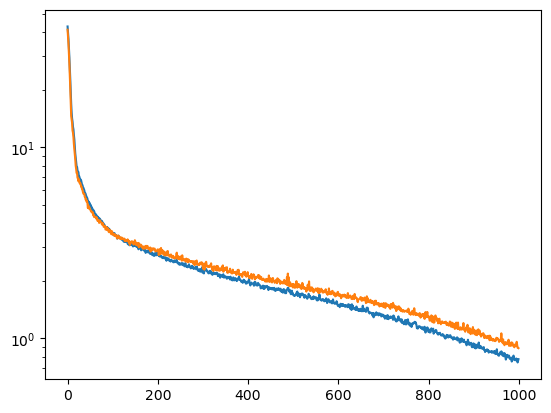

In [12]:
plt.plot(train_loss)
plt.plot(val_loss)
print(train_loss[-1], val_loss[-1])
plt.yscale("log")

In [15]:
data = next(iter(train_loader))
# mean = torch.zeros(data.shape)
# sig = obs_noise * torch.ones(data.shape)
# data += torch.normal(mean,sig)
data = data.cuda()
data.shape

torch.Size([16, 100, 1])

In [16]:
out, hidden = model(data)
hidden = hidden.cpu().detach().numpy().squeeze()

out.shape, hidden.shape

(torch.Size([16, 100, 1]), (16, 100, 10))

torch.Size([16, 1, 100, 100])


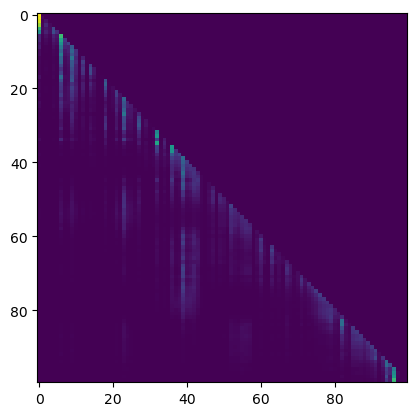

In [17]:
attn_scores = model.transformer.h.attn.attn_scores.cpu().detach().numpy()
print(model.transformer.h.attn.attn_scores.shape)
head_num = 0
plt.imshow(attn_scores[0, head_num])

Text(0.5, 1.0, 'Net attention')

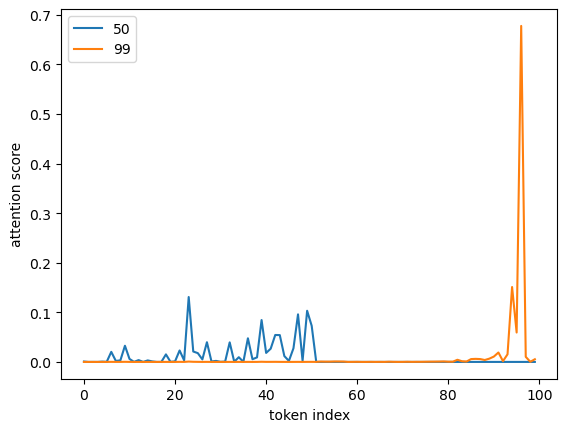

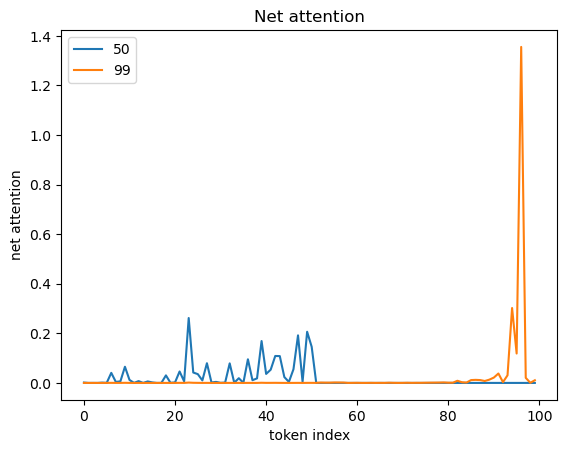

In [18]:
inds = [50, 99]  # np.arange(10,100,10)
# add a colormap of plasma for inds
net_attn = np.zeros(attn_scores[0, 0].shape)
for head in range(attn_scores.shape[1]):
    plt.figure()
    for ind in inds:
        net_attn += attn_scores[0, head]
        plt.plot(
            attn_scores[0, head, ind], label=ind
        )  # solidly uniform at first, leading to smoothness in output!
    plt.legend()
    plt.xlabel("token index")
    plt.ylabel("attention score")

plt.figure()
for ind in inds:
    plt.plot(net_attn[ind], label=ind)
plt.legend()
plt.xlabel("token index")
plt.ylabel("net attention")
plt.title("Net attention")

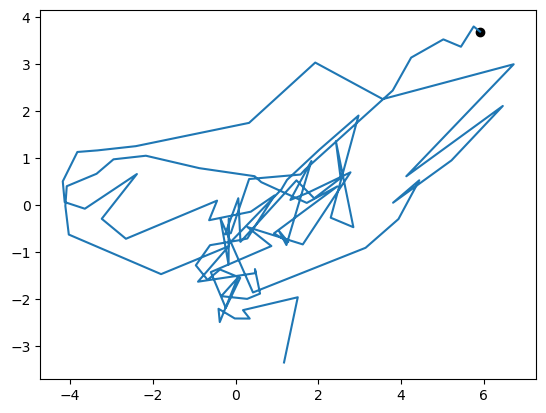

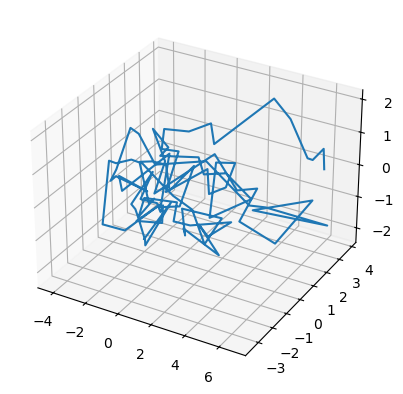

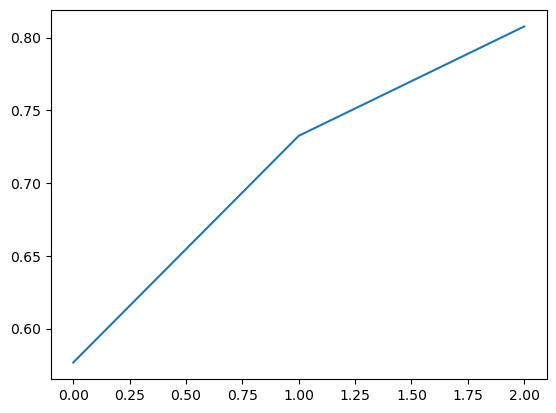

In [19]:
# run pca on the hidden states
from sklearn.decomposition import PCA

# hidden = hidden[]  # washout the first n

pca = PCA(n_components=3)
hflat = hidden.reshape(-1, hidden.shape[-1])
pca.fit(hflat)
hidden_pca = pca.transform(hflat).reshape((hidden.shape[0], hidden.shape[1], -1))

plt.figure()
# plt.plot(hidden_pca[:,0])
# plt.plot(hidden_pca[:,1])
plt.plot(hidden_pca[0, :, 0], hidden_pca[0, :, 1])
plt.scatter(hidden_pca[0, 0, 0], hidden_pca[0, 0, 1], c="black")

# plot in 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(hidden_pca[0, :, 0], hidden_pca[0, :, 1], hidden_pca[0, :, 2])
plt.figure()
# plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))

/tmp/ipykernel_3646533/1573241912.py:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  U, S, V = torch.svd(H.T)


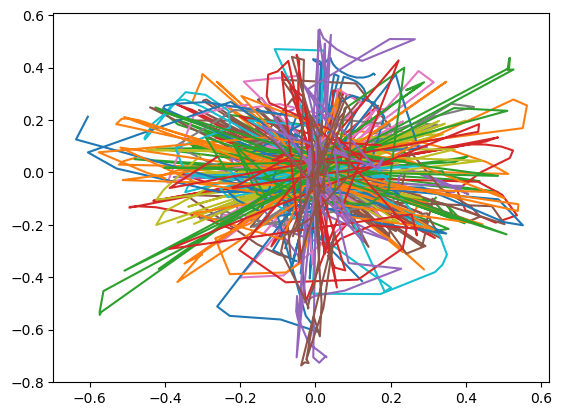

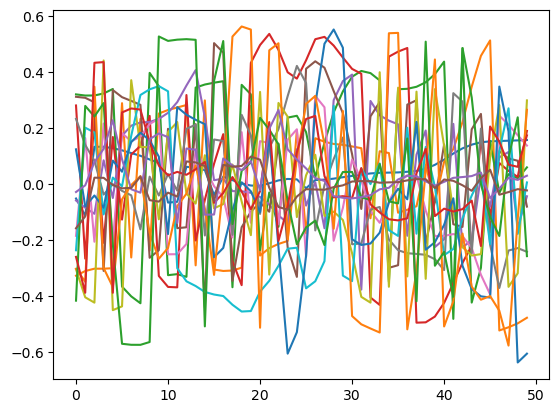

In [20]:
n_delays = 50
delay_interval = 1


H = embed_signal_torch(data, n_delays, delay_interval)

U, S, V = torch.svd(H.T)

V = V.cpu().numpy()
plt.plot(V[:, 0], V[:, 1])
plt.figure()
plt.plot(V[:1000, 0])

In [ ]:
# create a delay embedding with the attended values